In [221]:
import pandas as pd
import yfinance as yf

tickers=['AGRO.BA','ALUA.BA','AUSO.BA','BBAR.BA','BHIP.BA','BMA.BA',
         'BOLT.BA','BPAT.BA','BRIO.BA','BYMA.BA','CADO.BA','CAPX.BA',
         'CARC.BA','CECO2.BA','CELU.BA','CEPU.BA','CGPA2.BA','COME.BA',
         'CRES.BA','CTIO.BA','CVH.BA','DGCU2.BA','EDN.BA','FERR.BA',
         'GAMI.BA','GARO.BA','GCLA.BA','GGAL.BA','GRIM.BA','HARG.BA','HAVA.BA',
         'INAG.BA','INTR.BA','INVJ.BA','IRCP.BA','IRSA.BA','LOMA.BA','LEDE.BA',
         'LONG.BA','METR.BA','MIRG.BA','MOLA.BA','MOLI.BA','MORI.BA',
         'OEST.BA','PAMP.BA','PATA.BA','ROSE.BA','SAMI.BA','SEMI.BA',
         'SUPV.BA','TECO2.BA','TGNO4.BA','TGSU2.BA','TRAN.BA','TXAR.BA','YPFD.BA']

tickers_str=" ".join(tickers)
market=yf.Tickers(tickers_str)

market_df = market.history(period="1y")
market_df.head()

[*********************100%%**********************]  57 of 57 completed


Price      Capital Gains               Close                                   \
Ticker           BRIO.BA IRCP.BA     AGRO.BA     ALUA.BA AUSO.BA      BBAR.BA   
Date                                                                            
2023-09-04           0.0     0.0  119.047623  601.890991  1067.0  1182.660400   
2023-09-05           0.0     0.0  112.380951  579.395081  1011.0  1116.513672   
2023-09-06           0.0     0.0  113.333336  585.893860  1049.0  1099.126709   
2023-09-07           0.0     0.0  107.380951  560.398499   986.5  1028.318115   
2023-09-08           0.0     0.0  109.047623  564.397766   902.0   953.435974   

Price                                                   ...  Volume          \
Ticker        BHIP.BA       BMA.BA BOLT.BA     BPAT.BA  ... ROSE.BA SAMI.BA   
Date                                                    ...                   
2023-09-04  43.599552  1798.034180   16.50  322.543640  ...    5264   41945   
2023-09-05  41.549999  1690.479736   15.10  318.408539  ...       0   42491   
2023-09-06  41.223934  1626.699097   15.40  316.570648  ...    6630   33924   
2023-09-07  39.360710  1522.098755   14.80  306.462463  ...     200   36376   
2023-09-08  36.239799  1446.636230   14.75  285.786560  ...     200   23772   

Price                                                                    \
Ticker      SEMI.BA SUPV.BA TECO2.BA TGNO4.BA TGSU2.BA TRAN.BA  TXAR.BA   
Date                                                                      
2023-09-04   838521   72433    71684   147641    64809  267621   227875   
2023-09-05   941064  109455    90653   186945   281964  450852   739092   
2023-09-06   819150  159331    75904   178619   181432  279698   749909   
2023-09-07  1622926  795634   107414   246325   303234  332812  1081426   
2023-09-08  1006745  963717   241968   298735   367350  419761   526742   

Price               
Ticker     YPFD.BA  
Date                
2023-09-04  100286  
2023-09-05  311569  
2023-09-06  217827  
2023-09-07  349040  
2023-09-08  511794  

[5 rows x 401 columns]

In [222]:

print("Features per ticker: " ,set([i[0] for i in list(market_df.columns)]))
print("Amount of tickers: ", len(set([i[1] for i in list(market_df.columns)])))


Features per ticker:  {'Stock Splits', 'Dividends', 'Capital Gains', 'Open', 'Close', 'Low', 'Volume', 'High'}
Amount of tickers:  57


In [223]:
market_volume = market_df.Volume
market_volume.isnull().sum()

Ticker
AGRO.BA     0
ALUA.BA     0
AUSO.BA     0
BBAR.BA     0
BHIP.BA     0
BMA.BA      0
BOLT.BA     0
BPAT.BA     0
BRIO.BA     1
BYMA.BA     0
CADO.BA     0
CAPX.BA     0
CARC.BA     0
CECO2.BA    0
CELU.BA     0
CEPU.BA     0
CGPA2.BA    0
COME.BA     0
CRES.BA     0
CTIO.BA     0
CVH.BA      0
DGCU2.BA    0
EDN.BA      0
FERR.BA     0
GAMI.BA     0
GARO.BA     0
GCLA.BA     0
GGAL.BA     0
GRIM.BA     0
HARG.BA     0
HAVA.BA     0
INAG.BA     1
INTR.BA     0
INVJ.BA     0
IRCP.BA     1
IRSA.BA     0
LEDE.BA     0
LOMA.BA     0
LONG.BA     0
METR.BA     0
MIRG.BA     0
MOLA.BA     0
MOLI.BA     0
MORI.BA     0
OEST.BA     0
PAMP.BA     0
PATA.BA     0
ROSE.BA     0
SAMI.BA     0
SEMI.BA     0
SUPV.BA     0
TECO2.BA    0
TGNO4.BA    0
TGSU2.BA    0
TRAN.BA     0
TXAR.BA     0
YPFD.BA     0
dtype: int64

In [224]:
print("Column full of 0: ",any(market_volume.sum() == 0 ))
print("Row full of 0: " ,any(market_volume.transpose().sum() == 0 ))


Column full of 0:  True
Row full of 0:  False


In [225]:
#Removing columns full o 0
market_volume= market_volume.transpose()[market_volume.sum() != 0].transpose()
print("Column full of 0: ",any(market_volume.sum() == 0 ))

Column full of 0:  False


<Axes: title={'center': 'One year total volume'}, ylabel='Ticker'>

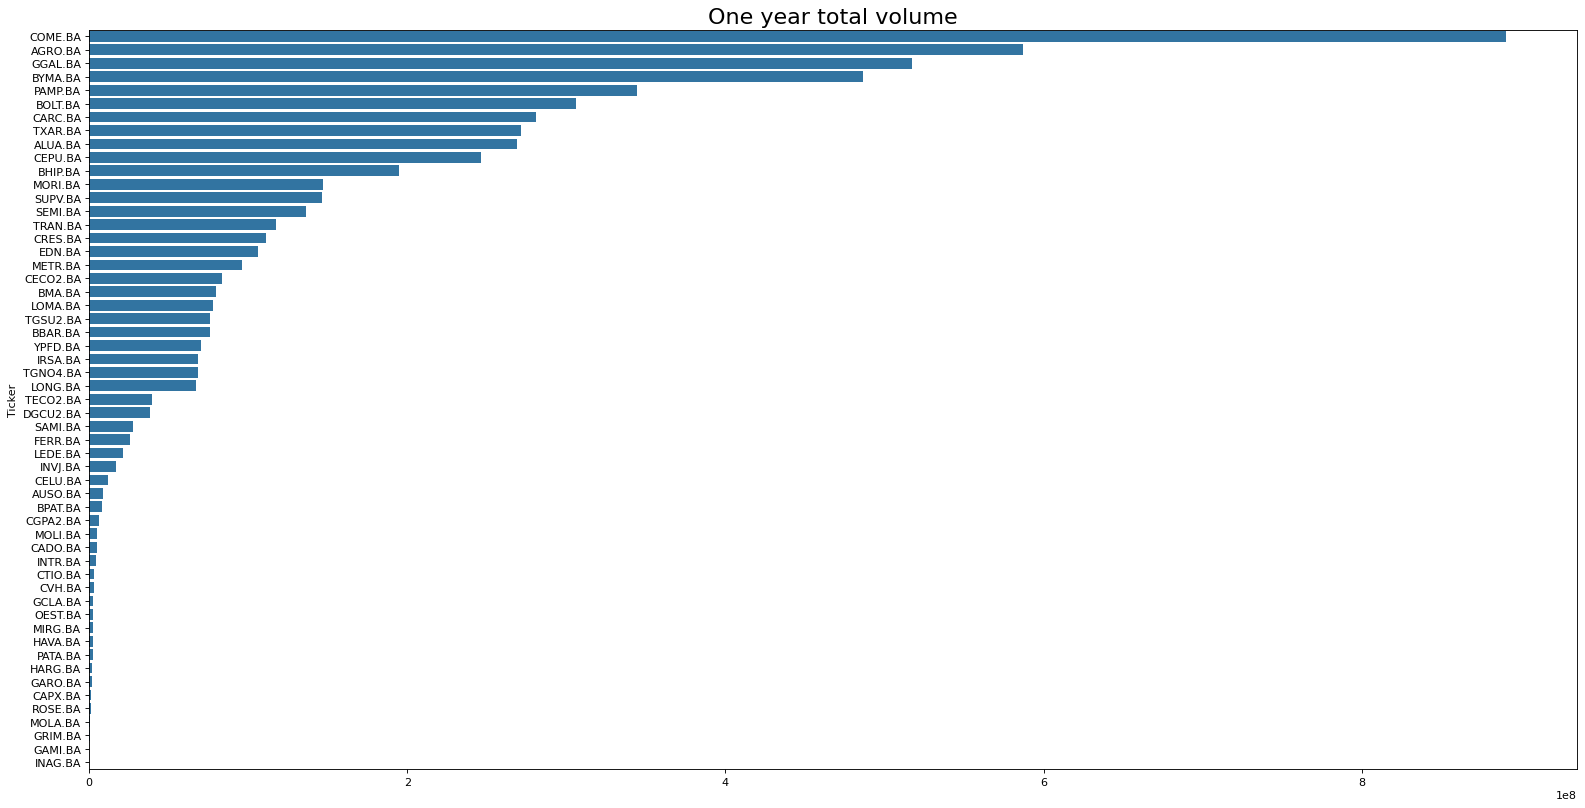

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

market_volume_total = market_volume.sum().sort_values(ascending= False)
plt.figure(figsize=(24, 12), dpi=80)
plt.title("One year total volume" , fontsize=20)
sns.barplot(market_volume_total , orient="h")


C:\Users\PC1\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[[<Axes: title={'center': 'AGRO.BA'}> <Axes: title={'center': 'ALUA.BA'}>
  <Axes: title={'center': 'AUSO.BA'}>]
 [<Axes: title={'center': 'BBAR.BA'}> <Axes: title={'center': 'BHIP.BA'}>
  <Axes: title={'center': 'BMA.BA'}>]
 [<Axes: title={'center': 'BOLT.BA'}> <Axes: title={'center': 'BPAT.BA'}>
  <Axes: title={'center': 'BYMA.BA'}>]
 [<Axes: title={'center': 'CADO.BA'}> <Axes: title={'center': 'CAPX.BA'}>
  <Axes: >]]
[[<Axes: title={'center': 'CARC.BA'}>
  <Axes: title={'center': 'CECO2.BA'}>
  <Axes: title={'center': 'CELU.BA'}>]
 [<Axes: title={'center': 'CEPU.BA'}>
  <Axes: title={'center': 'CGPA2.BA'}>
  <Axes: title={'center': 'COME.BA'}>]
 [<Axes: title={'center': 'CRES.BA'}> <Axes: title={'center': 'CTIO.BA'}>
  <Axes: title={'center': 'CVH.BA'}>]
 [<Axes: title={'center': 'DGCU2.BA'}> <Axes: title={'center': 'EDN.BA'}>
  <Axes: >]]
[[<Axes: title={'center': 'FERR.BA'}> <Axes: title={'center': 'GAMI.BA'}>
  <Axes: title={'center': 'GARO.BA'}>]
 [<Axes: title={'center': 'GCLA

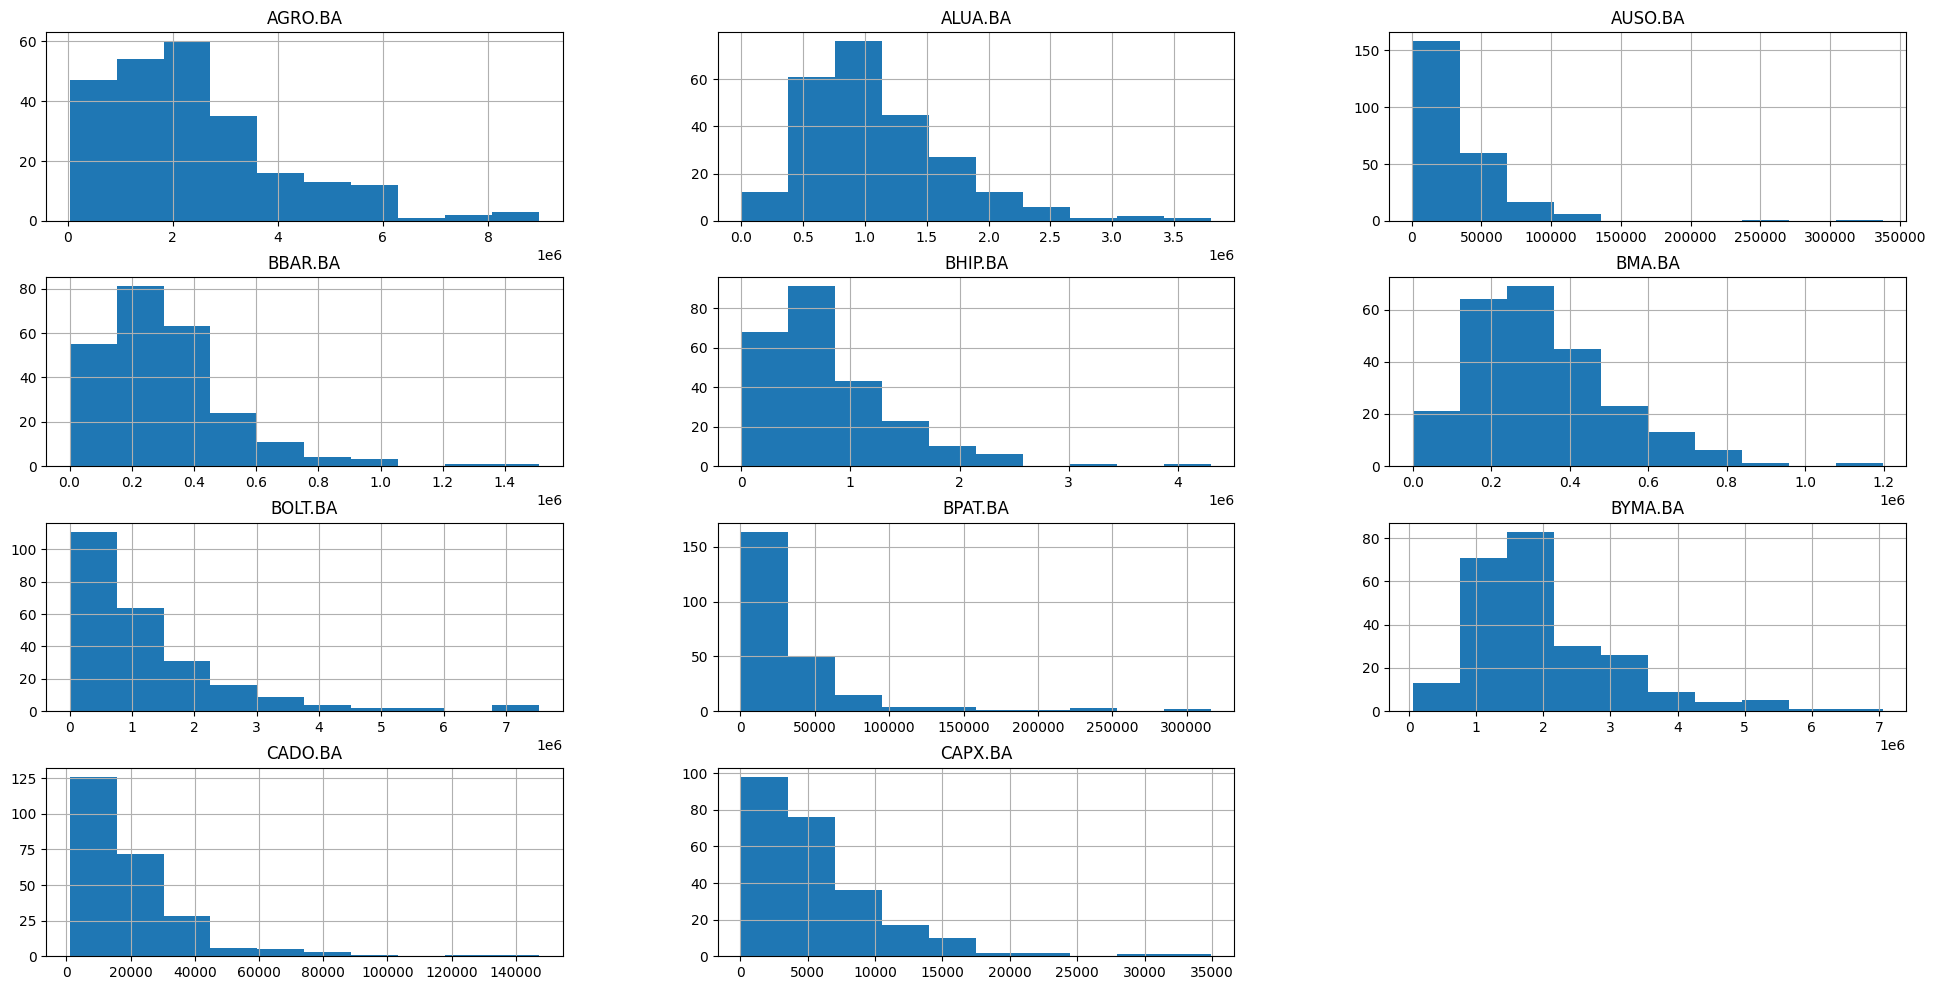

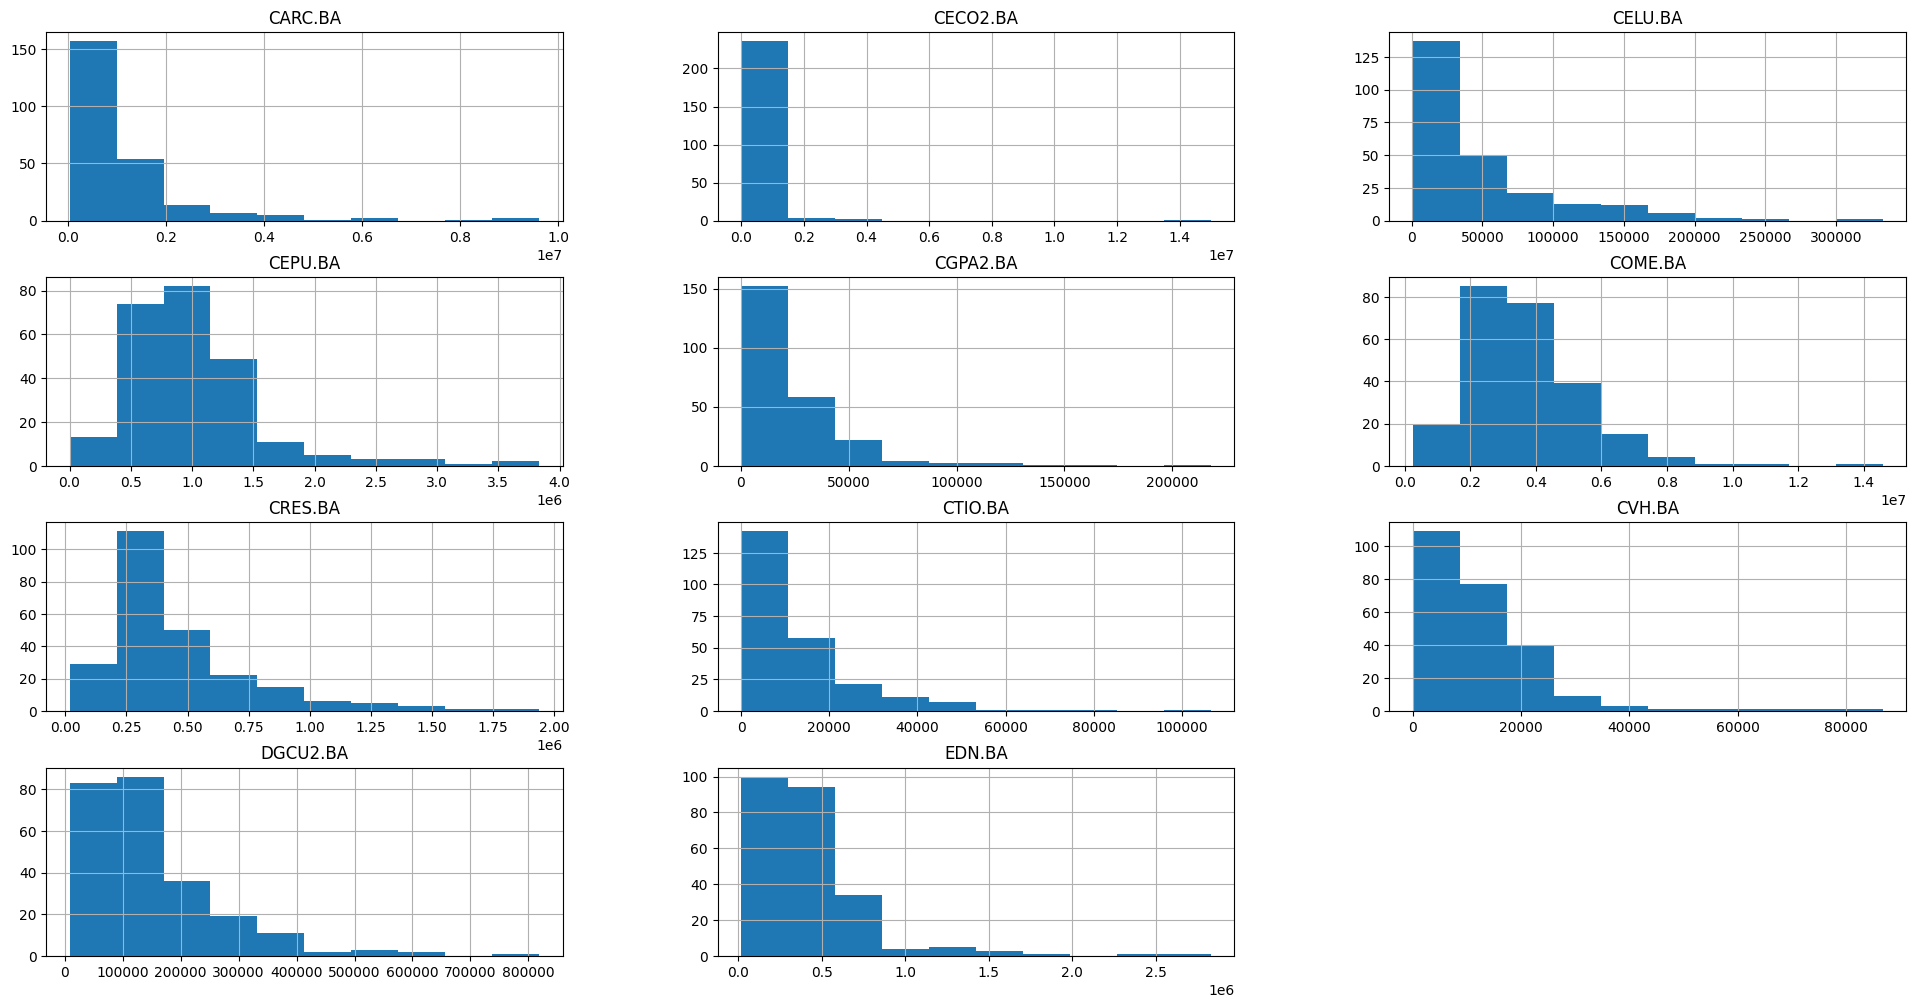

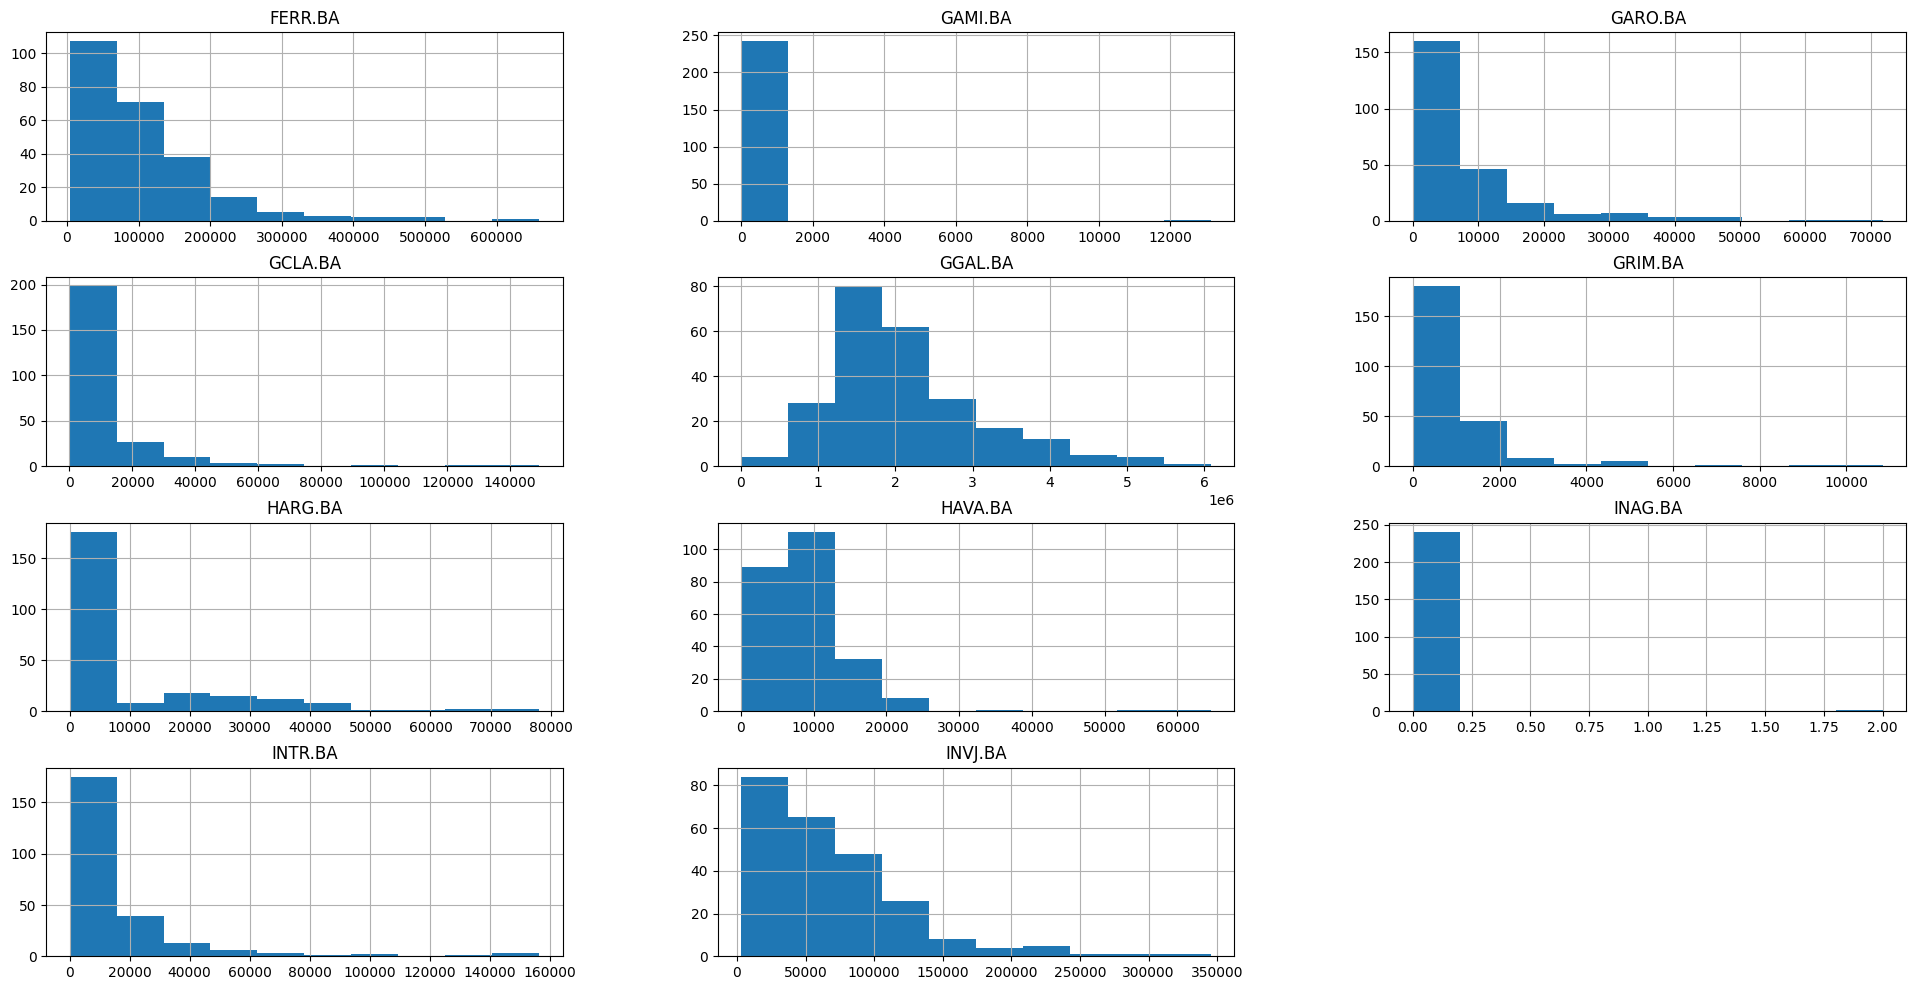

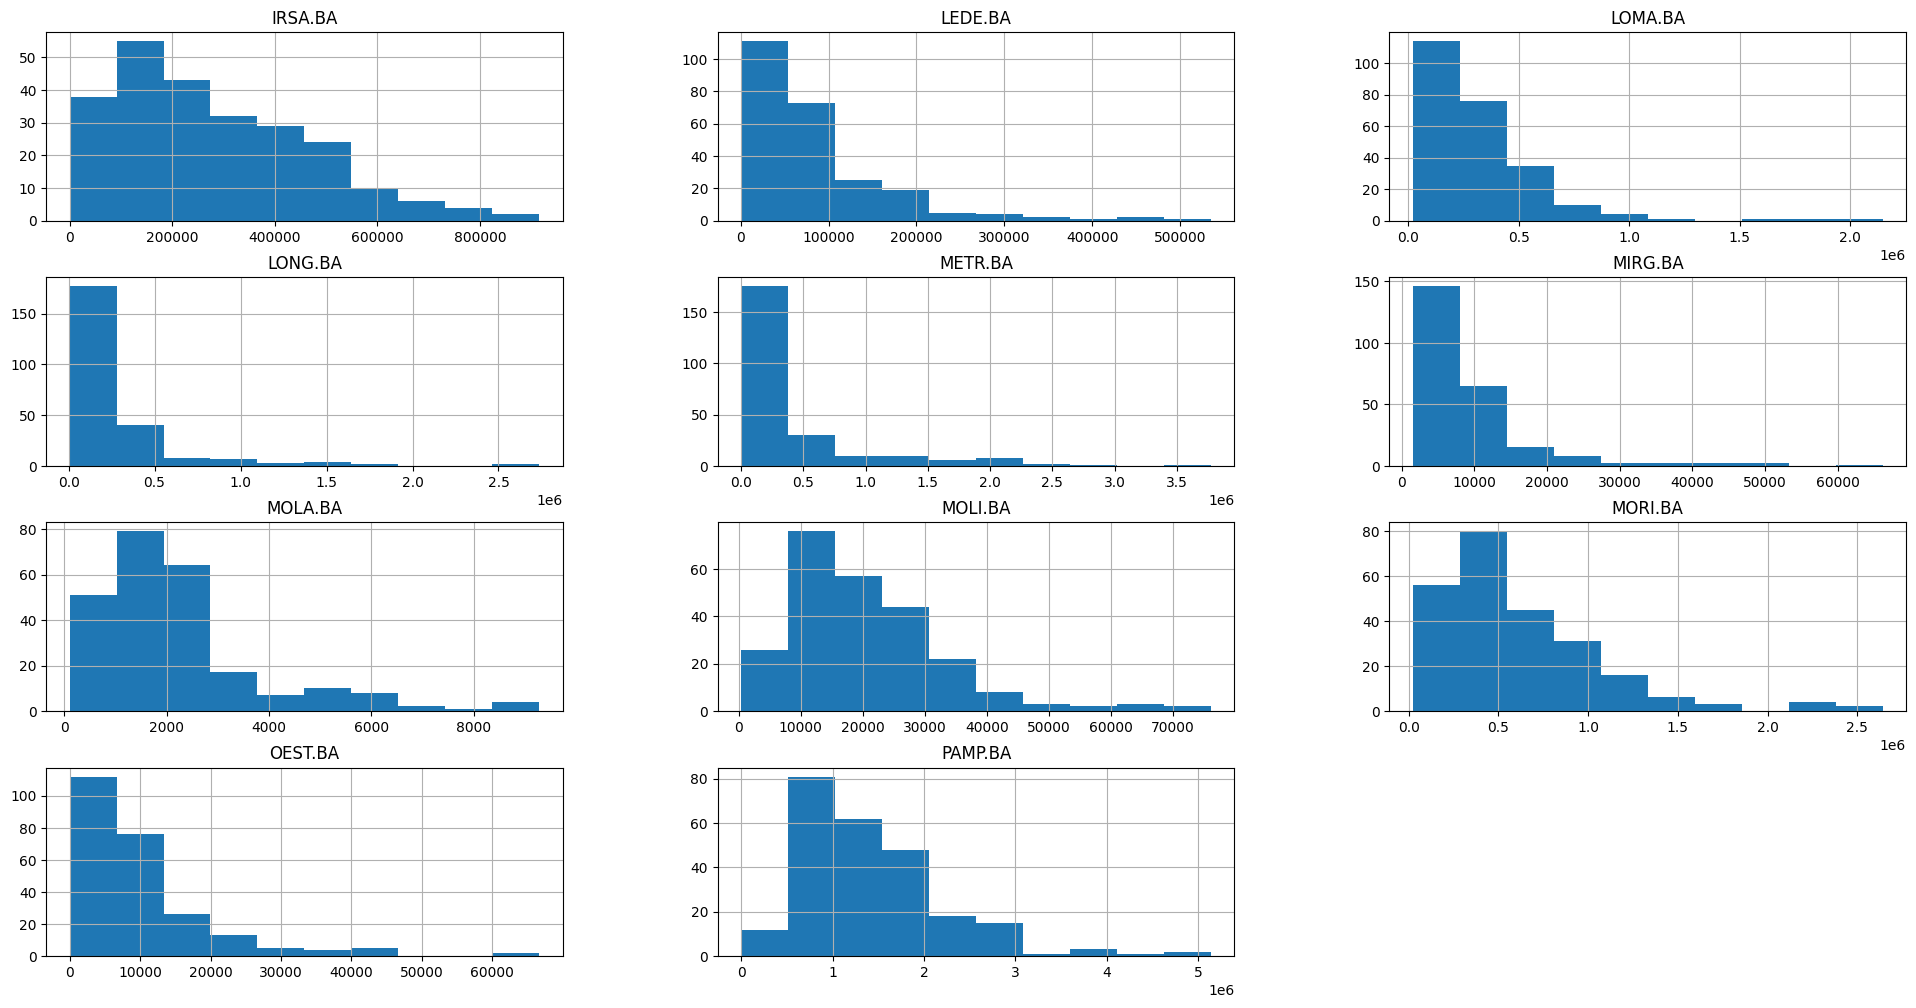

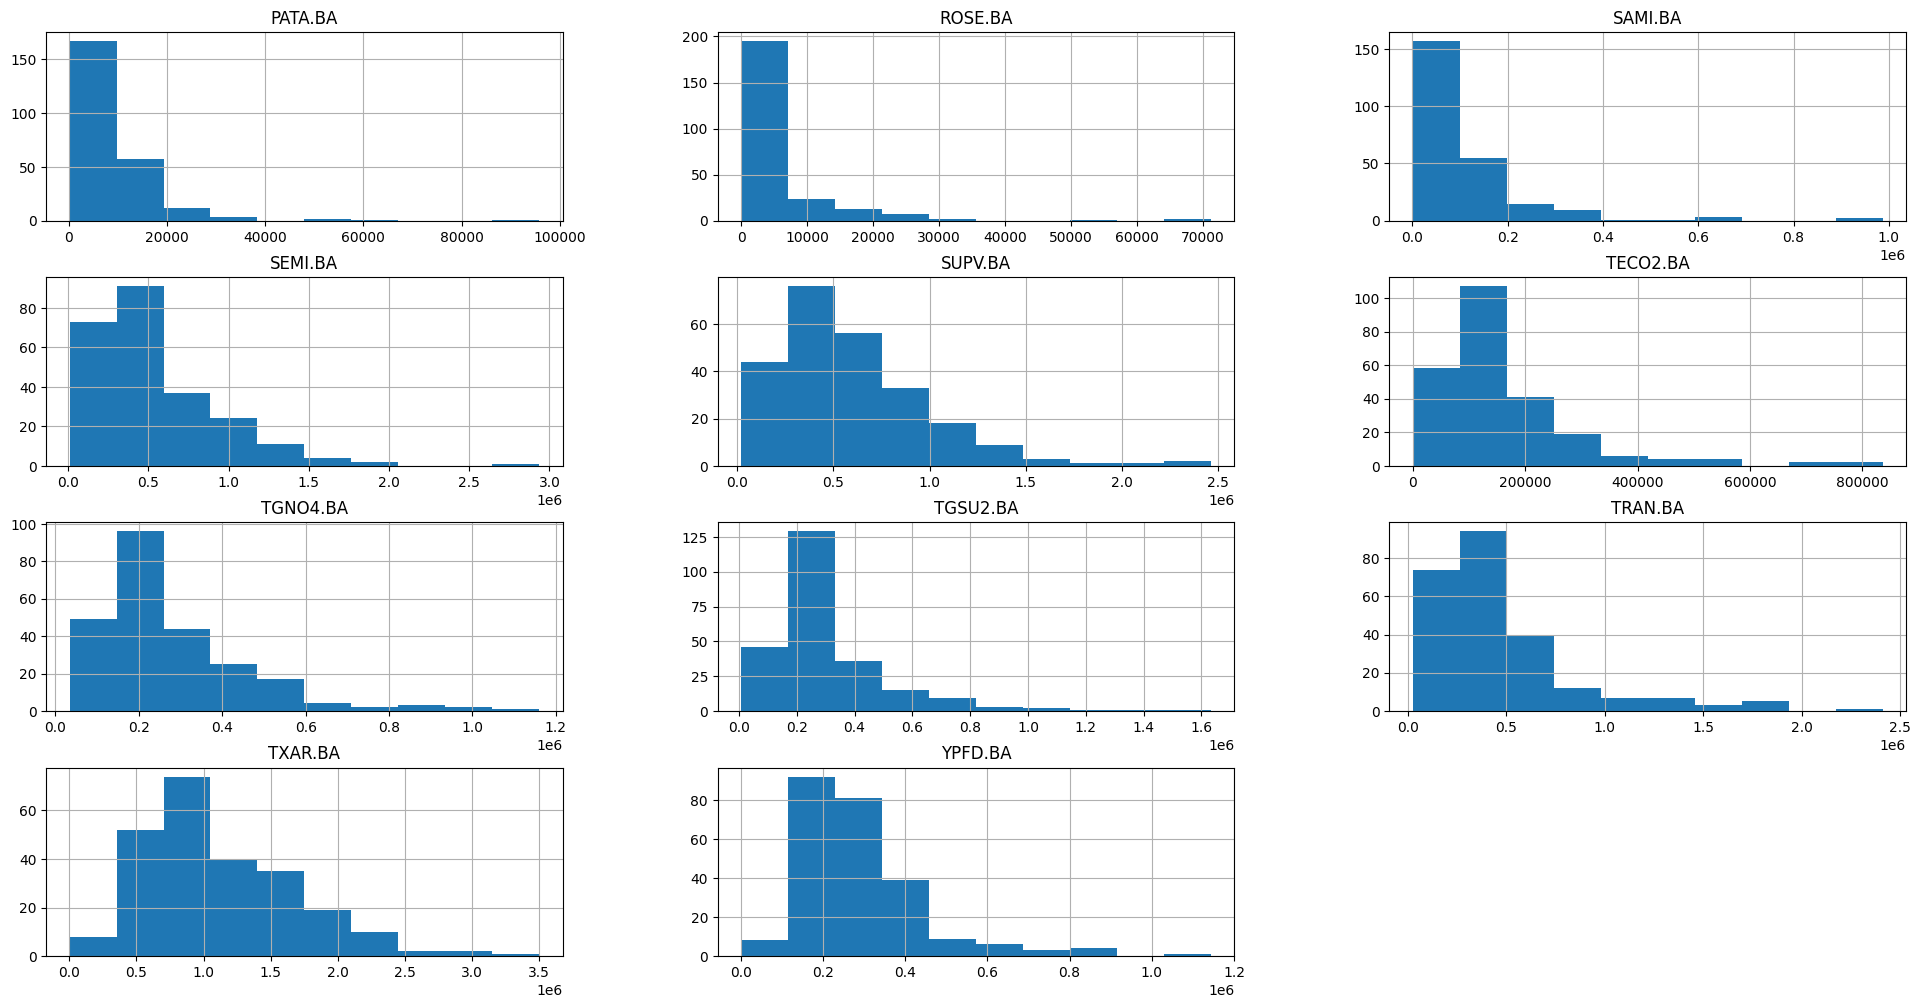

In [227]:
#Distributions of volumes per day
import numpy as np

market_volume_split = np.array_split(market_volume.transpose(), 5)

for i in range(0,5):
       df = pd.DataFrame(market_volume_split[i].transpose())
       print(df.hist(figsize=(24,12)))

C:\Users\PC1\AppData\Local\Temp\ipykernel_10220\806472709.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_volume_corr = market_volume.pct_change().corr()


<Axes: title={'center': 'Correlations'}, xlabel='Ticker', ylabel='Ticker'>

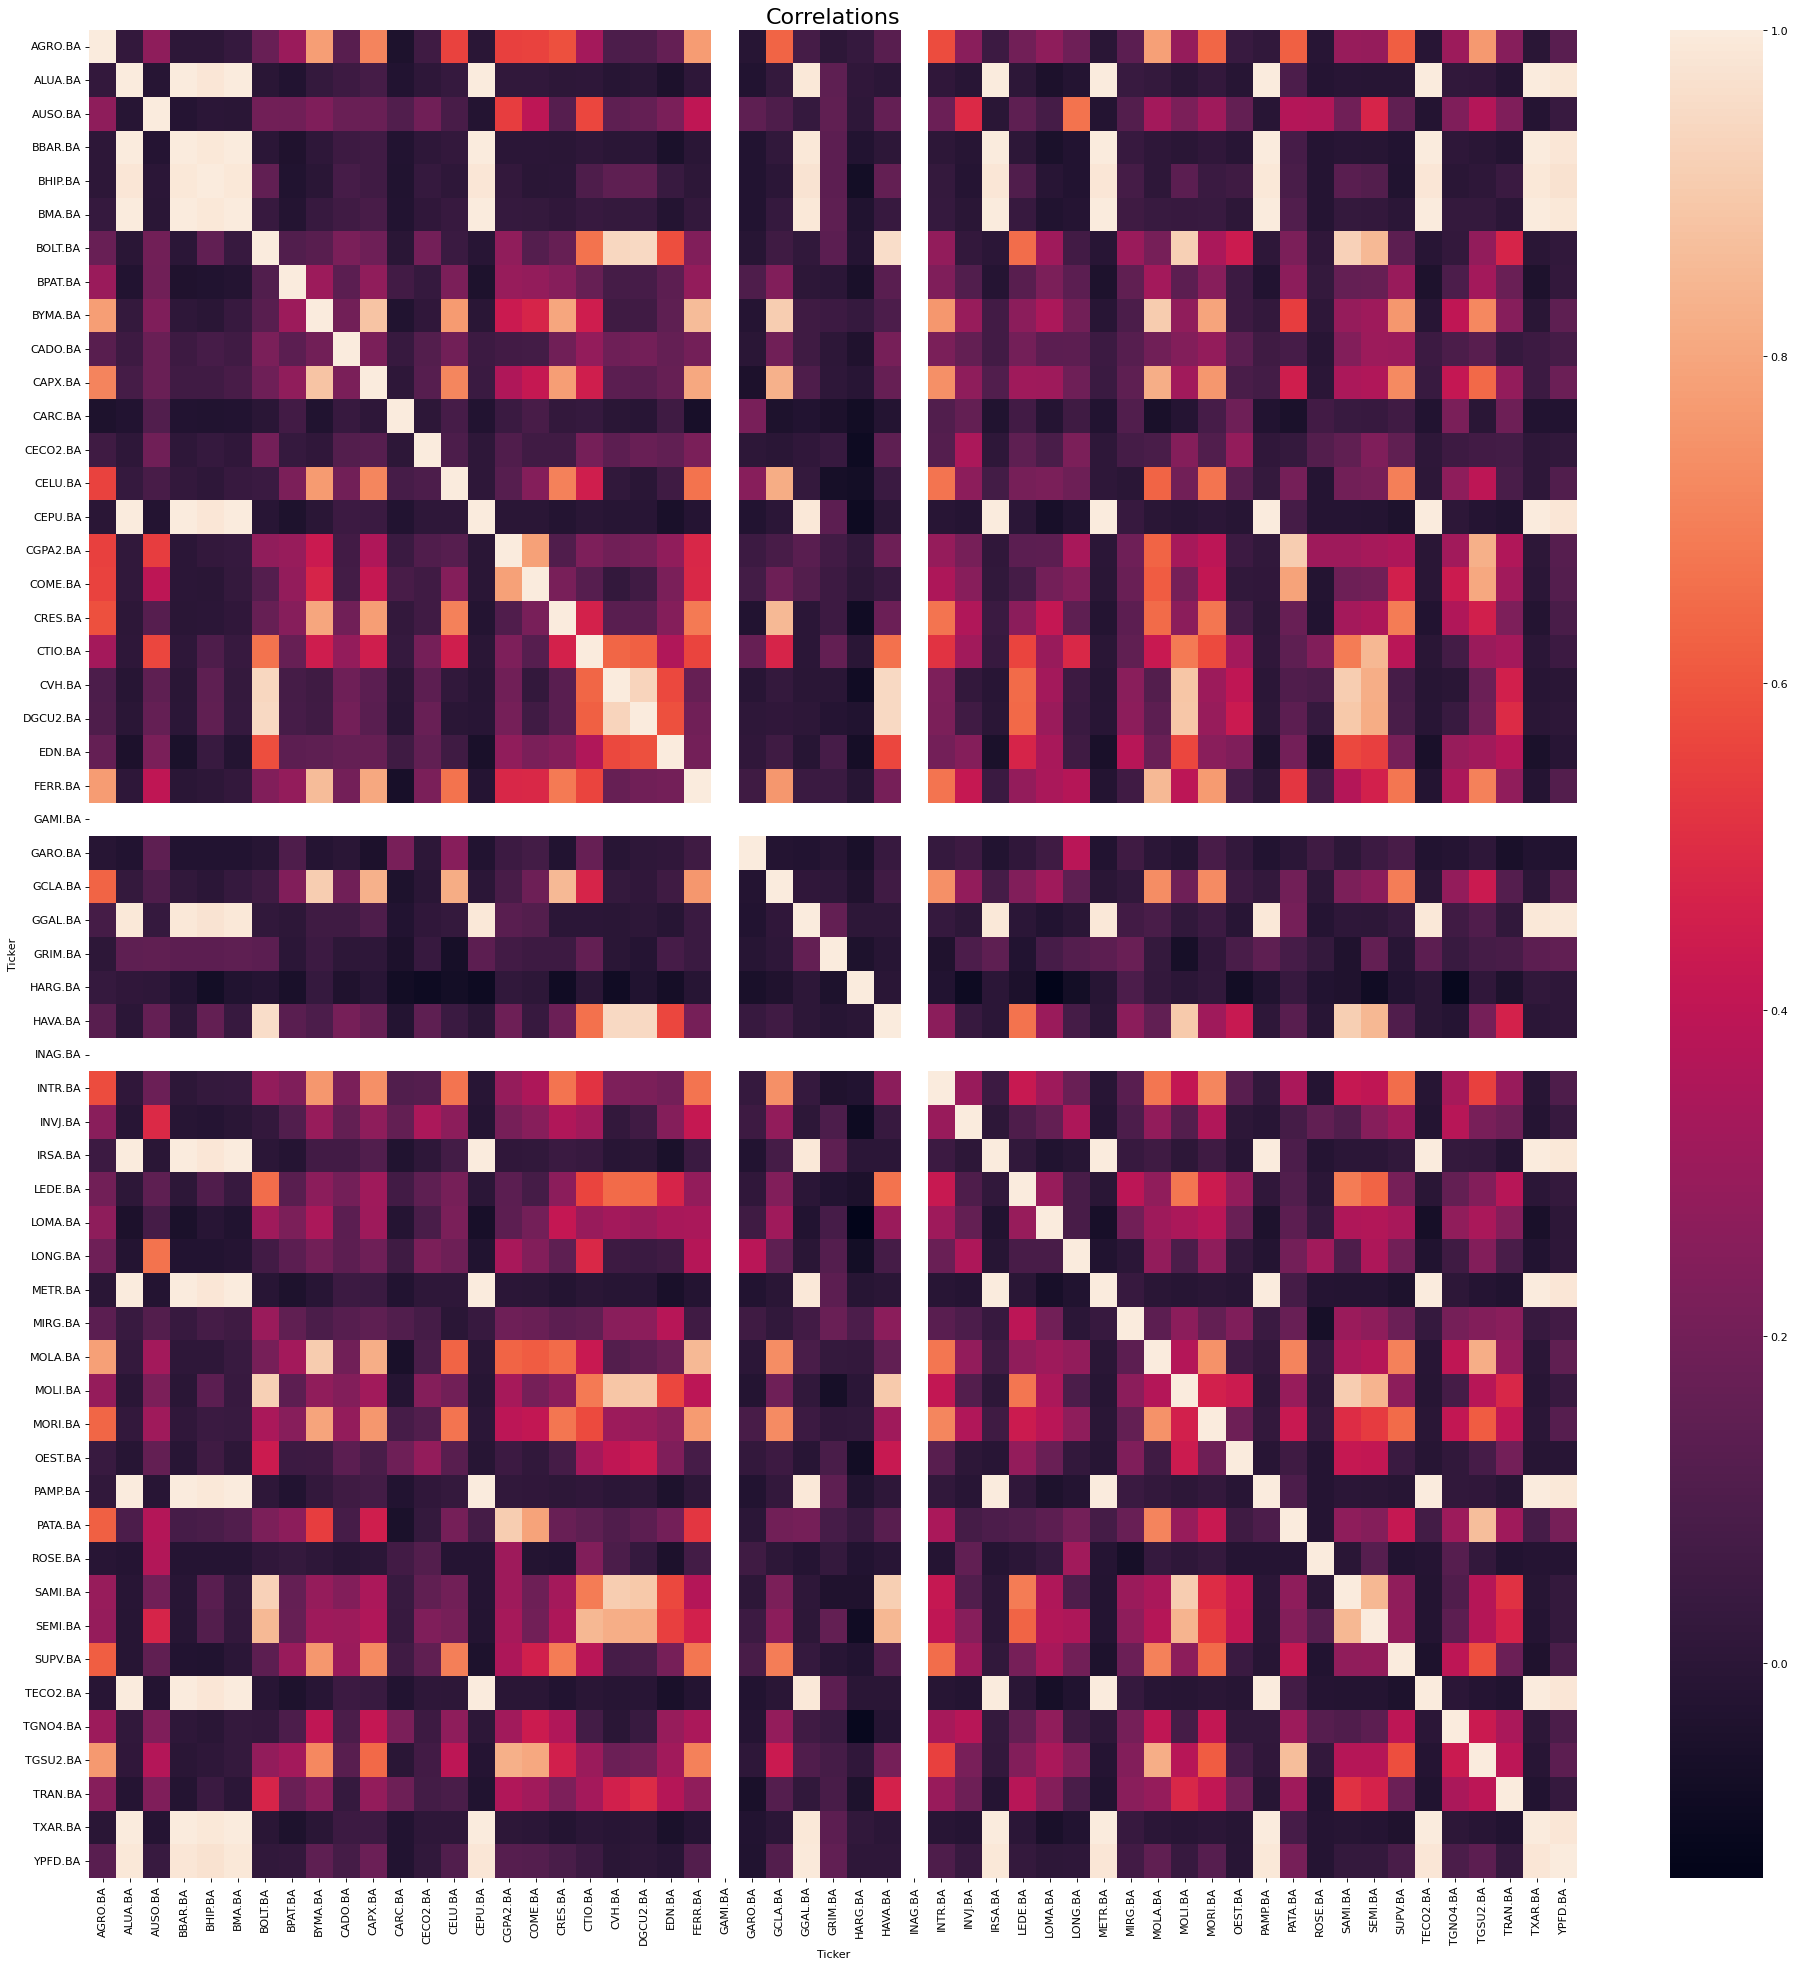

In [228]:
#Volume change correlation matrix
market_volume_corr = market_volume.pct_change().corr() 

plt.figure(figsize=(30, 30), dpi=80)
plt.title( "Correlations", fontsize=20)
sns.heatmap(market_volume_corr )

In [229]:
#Checking INAG.BA
market_volume["INAG.BA"].sum()

2.0

In [230]:
#INAG.BA should be removed and actualize market_volume_corr 
market_volume.drop(columns=["INAG.BA"] , inplace=True)
market_volume_corr = market_volume.pct_change().corr() 

## Correlations of stocks in general panel against stocks out of the general panel.

The general panel are the main list of stocks from BYMA , and we want to explore the volume change behavior between both groups.

[Text(277.77777777777777, 0.5, 'General panel'),
 Text(0.5, 109.77777777777776, 'Stocks out of general panel')]

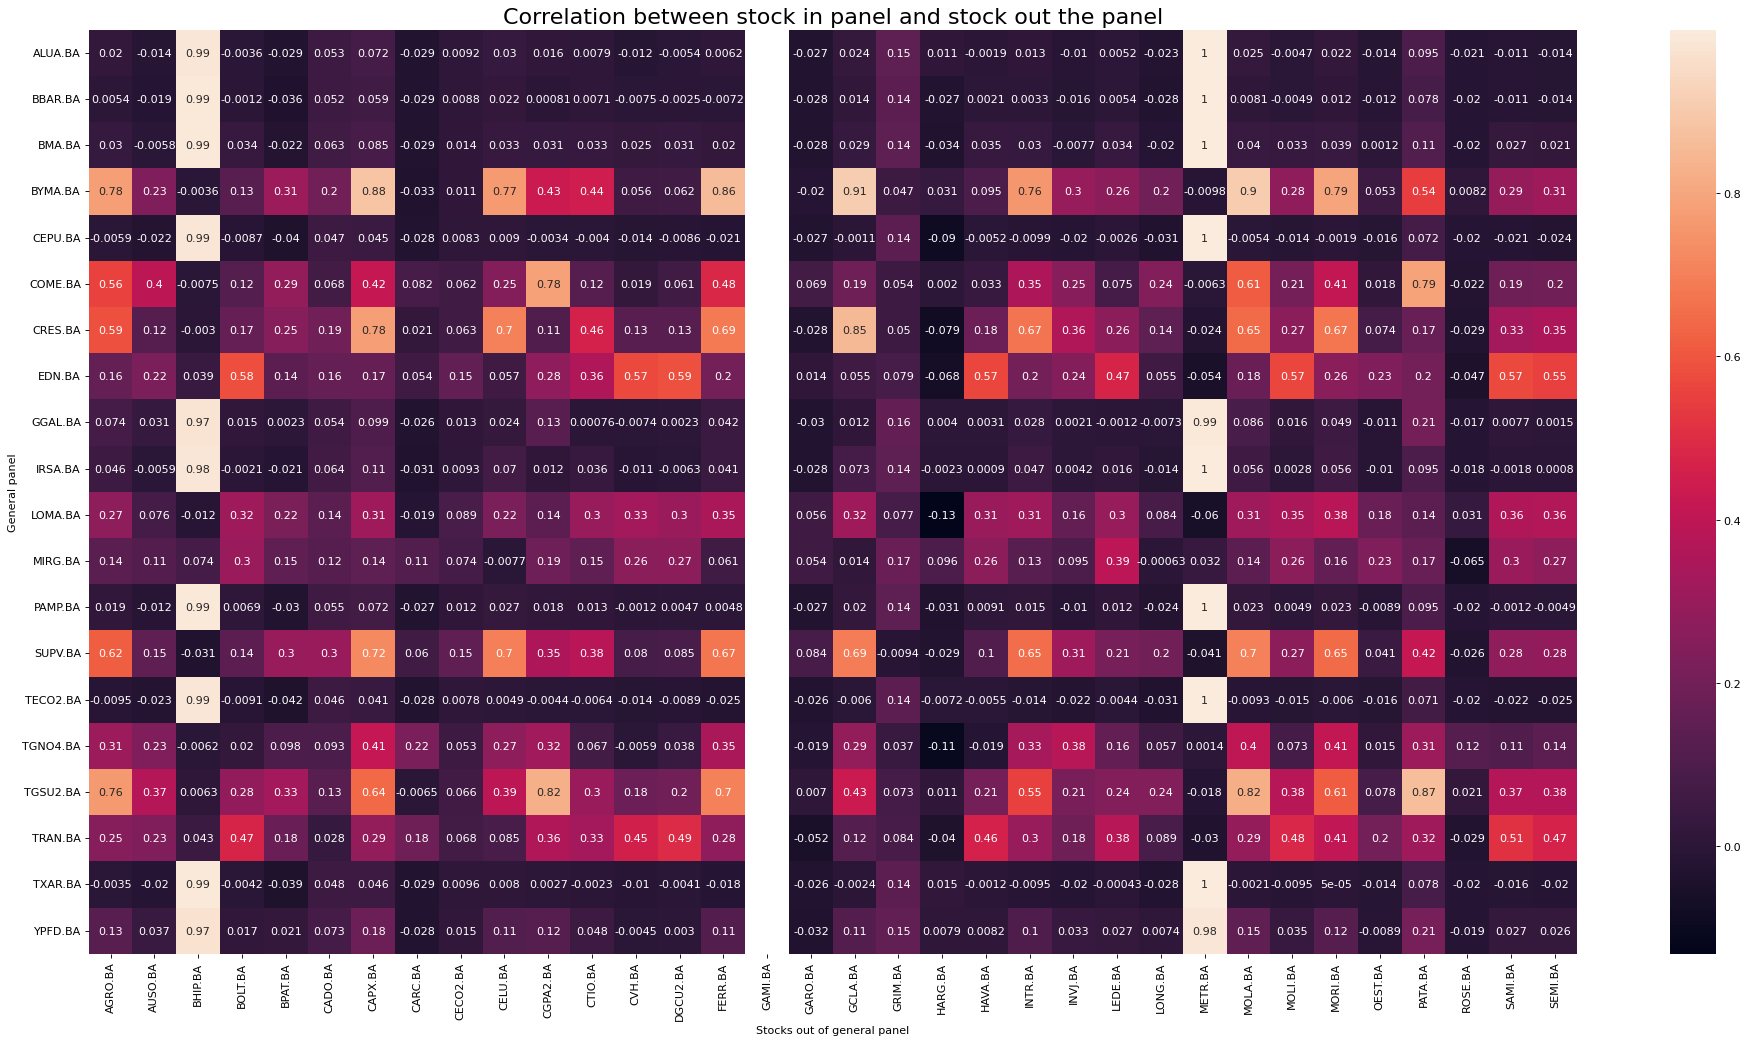

In [231]:

panel_general= ["ALUA.BA", "BBAR.BA" ,"BMA.BA" ,"BYMA.BA", "CEPU.BA" ,"COME.BA", "CRES.BA", 
                "EDN.BA", "GGAL.BA", "IRSA.BA" ,"LOMA.BA", "MIRG.BA", "PAMP.BA" ,"SUPV.BA",
                 "TECO2.BA", "TGNO4.BA" ,"TGSU2.BA" ,"TRAN.BA","TXAR.BA" , "YPFD.BA"]

#Volume change correlation matrix between both groups
corr_with_panel = market_volume_corr.loc[panel_general ,  ~market_volume_corr.columns.isin(panel_general)]

plt.figure(figsize=(30, 15), dpi=80)
plt.title( "Correlation between stock in panel and stock out the panel", fontsize=20)
sns.heatmap(corr_with_panel , annot=True).set(ylabel = "General panel", xlabel="Stocks out of general panel")


In [232]:
#Statistics of General panel in correlation matrix
corr_with_panel.transpose().describe()

Ticker,ALUA.BA,BBAR.BA,BMA.BA,BYMA.BA,CEPU.BA,COME.BA,CRES.BA,EDN.BA,GGAL.BA,IRSA.BA,LOMA.BA,MIRG.BA,PAMP.BA,SUPV.BA,TECO2.BA,TGNO4.BA,TGSU2.BA,TRAN.BA,TXAR.BA,YPFD.BA
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.070309,0.064940,0.083533,0.329521,0.056581,0.222912,0.281183,0.236573,0.088592,0.082210,0.198926,0.147716,0.071751,0.287041,0.057460,0.156525,0.323246,0.239071,0.061742,0.113629
std,0.240657,0.242013,0.237818,0.323145,0.244483,0.225125,0.272067,0.208742,0.236221,0.237918,0.142150,0.103930,0.240449,0.255422,0.243765,0.152584,0.268933,0.177198,0.242739,0.231683
min,-0.029461,-0.035569,-0.033922,-0.033099,-0.090052,-0.022472,-0.078856,-0.067760,-0.029751,-0.030948,-0.131566,-0.064951,-0.030735,-0.041070,-0.042246,-0.106559,-0.018254,-0.052198,-0.039242,-0.031782
25%,-0.012423,-0.014252,0.001152,0.052529,-0.020565,0.060533,0.074197,0.056953,0.001466,-0.005942,0.084422,0.074424,-0.008918,0.083959,-0.022091,0.036689,0.078378,0.085045,-0.018393,0.008242
50%,0.006185,0.000815,0.030497,0.262899,-0.008649,0.185231,0.180438,0.200013,0.013058,0.009271,0.224084,0.140867,0.009054,0.268398,-0.009062,0.106701,0.283442,0.249100,-0.003497,0.034540
75%,0.023795,0.011906,0.035358,0.541539,-0.001100,0.350432,0.464238,0.361410,0.054493,0.055989,0.314248,0.232168,0.022835,0.417389,-0.004361,0.309927,0.432707,0.380846,0.008007,0.120442
max,0.999180,0.999763,0.997642,0.909828,0.999972,0.788720,0.853974,0.588043,0.987761,0.996848,0.383638,0.391578,0.999320,0.723070,0.999975,0.413424,0.867021,0.509456,0.999923,0.983945


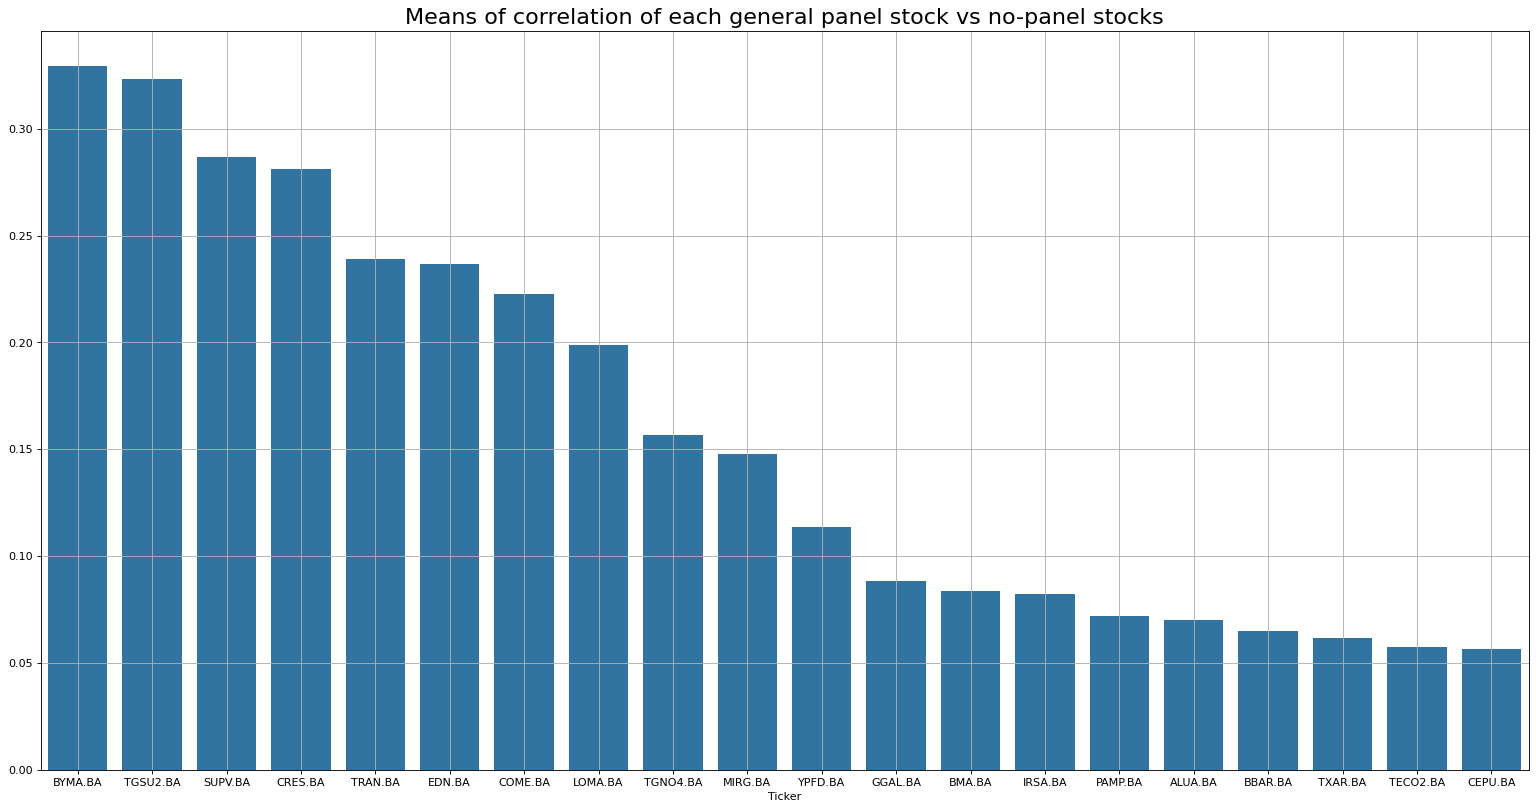

In [233]:
plt.figure(figsize=(24, 12), dpi=80)
plt.title("Means of correlation of each general panel stock vs no-panel stocks" ,fontsize=20)
sns.barplot(corr_with_panel.transpose().mean().sort_values(ascending=False))
plt.grid()

In [234]:
#Statistics of no-panel stocks vs general panel
corr_with_panel.describe()

Ticker,AGRO.BA,AUSO.BA,BHIP.BA,BOLT.BA,BPAT.BA,CADO.BA,CAPX.BA,CARC.BA,CECO2.BA,CELU.BA,...,LONG.BA,METR.BA,MOLA.BA,MOLI.BA,MORI.BA,OEST.BA,PATA.BA,ROSE.BA,SAMI.BA,SEMI.BA
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.236957,0.104532,0.496929,0.128889,0.101456,0.099385,0.279162,0.019381,0.044839,0.188514,...,0.055438,0.487702,0.269164,0.158626,0.253247,0.050704,0.251541,-0.011378,0.163871,0.163362
std,0.271875,0.135309,0.500125,0.175495,0.140575,0.069960,0.273609,0.076137,0.045830,0.253823,...,0.097610,0.522305,0.304494,0.185602,0.267135,0.087855,0.233731,0.037699,0.195089,0.191984
min,-0.009532,-0.023074,-0.031171,-0.009062,-0.042246,0.028063,0.040640,-0.033099,0.007818,-0.007688,...,-0.031319,-0.059686,-0.009252,-0.015297,-0.006028,-0.015777,0.070896,-0.064951,-0.022230,-0.025290
25%,0.019680,-0.012251,-0.003145,-0.001420,-0.029515,0.052807,0.072210,-0.028603,0.009491,0.023191,...,-0.023199,-0.019707,0.024472,0.000964,0.022550,-0.011460,0.095198,-0.023347,-0.004037,-0.007122
50%,0.133606,0.056316,0.522624,0.026705,0.059604,0.065948,0.155507,-0.026320,0.014642,0.063707,...,0.003362,0.508126,0.145778,0.053831,0.139803,0.008223,0.170996,-0.019683,0.067084,0.083556
75%,0.371770,0.222392,0.986254,0.195042,0.230476,0.129018,0.414903,0.055528,0.066838,0.253611,...,0.102895,0.999215,0.455362,0.270104,0.408198,0.075242,0.311847,-0.017347,0.309212,0.323958
max,0.777490,0.398338,0.990286,0.584136,0.325835,0.304484,0.883592,0.221284,0.151760,0.766872,...,0.240309,0.999975,0.904408,0.565902,0.792483,0.232421,0.867021,0.122753,0.569428,0.548342


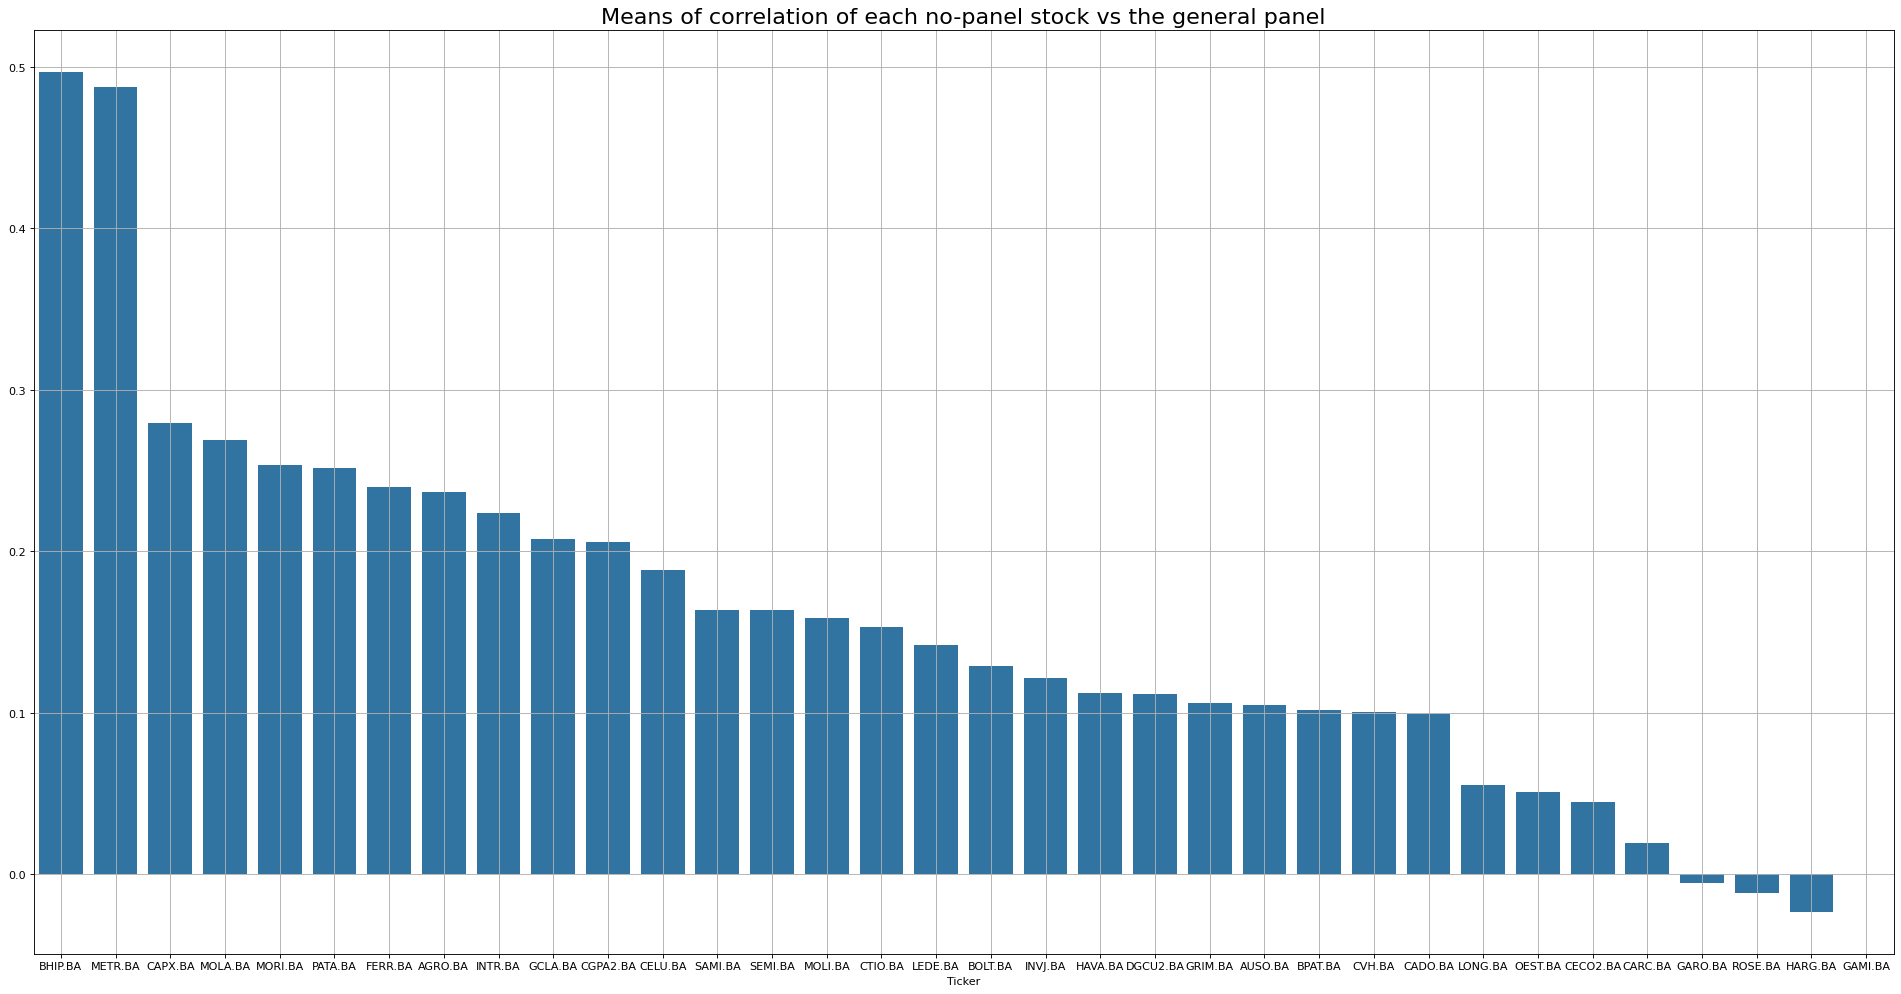

In [235]:
plt.figure(figsize=(30, 15), dpi=80)
plt.title("Means of correlation of each no-panel stock vs the general panel" , fontsize=20)
sns.barplot(corr_with_panel.mean().sort_values(ascending=False))
plt.grid()

## Exploring general panel total volume against no-panel total volume along the year

In [236]:
#Dividing market_volume in both groups
panel_volume_d = market_volume[panel_general].transpose().sum()
nonpanel_volume_d= market_volume.loc[:,~(market_volume.columns.isin(panel_general))].transpose().sum()

#Dataframe with total volume per day of both groups
volumes_d = pd.concat([panel_volume_d , nonpanel_volume_d], axis=1)
volumes_d.rename(columns={0 : "Volume general panel" , 1 : "Volume no-panel"} , inplace=True)

volumes_d.head()

,Volume general panel,Volume no-panel
Date,,
2023-09-04,6238216.0,5379263.0
2023-09-05,13375742.0,4458566.0
2023-09-06,11684578.0,3061816.0
2023-09-07,17526808.0,4136028.0
2023-09-08,15674334.0,3458515.0


In [237]:
volumes_d.describe()

,Volume general panel,Volume no-panel
count,2.430000e+02,2.430000e+02
mean,1.672841e+07,8.633353e+06
std,5.607944e+06,4.628083e+06
min,1.247824e+06,4.880510e+05
25%,1.340797e+07,5.381562e+06
50%,1.567433e+07,8.344289e+06
75%,1.959027e+07,1.092570e+07
max,3.807000e+07,3.175415e+07


<Axes: >

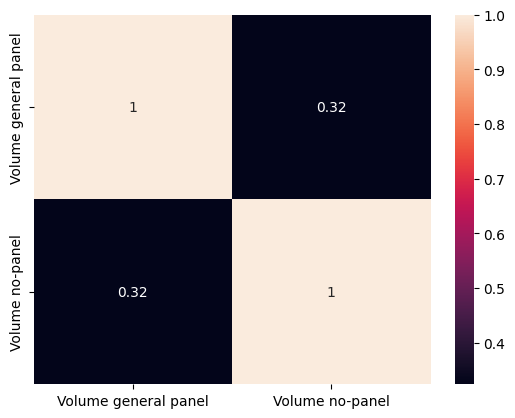

In [238]:
#Correlation between both groups
sns.heatmap(volumes_d.corr() , annot=True)

<Axes: title={'center': 'One year volumes'}, xlabel='Date'>

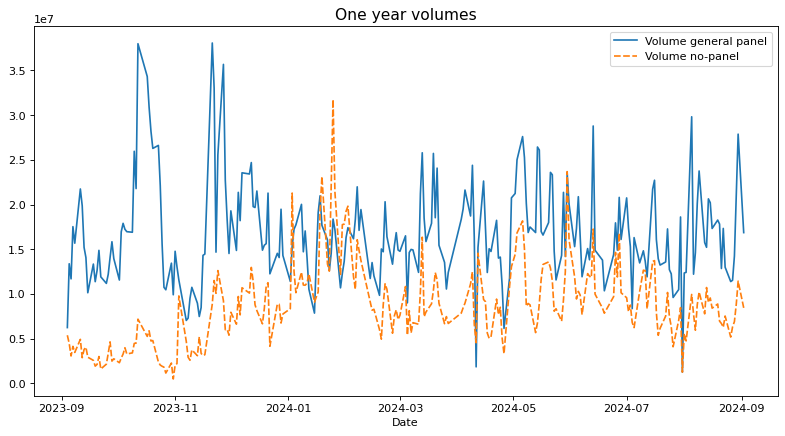

In [239]:
plt.figure(figsize=(12, 6), dpi=80)
plt.title( "One year volumes", fontsize=14)
sns.lineplot(volumes_d)

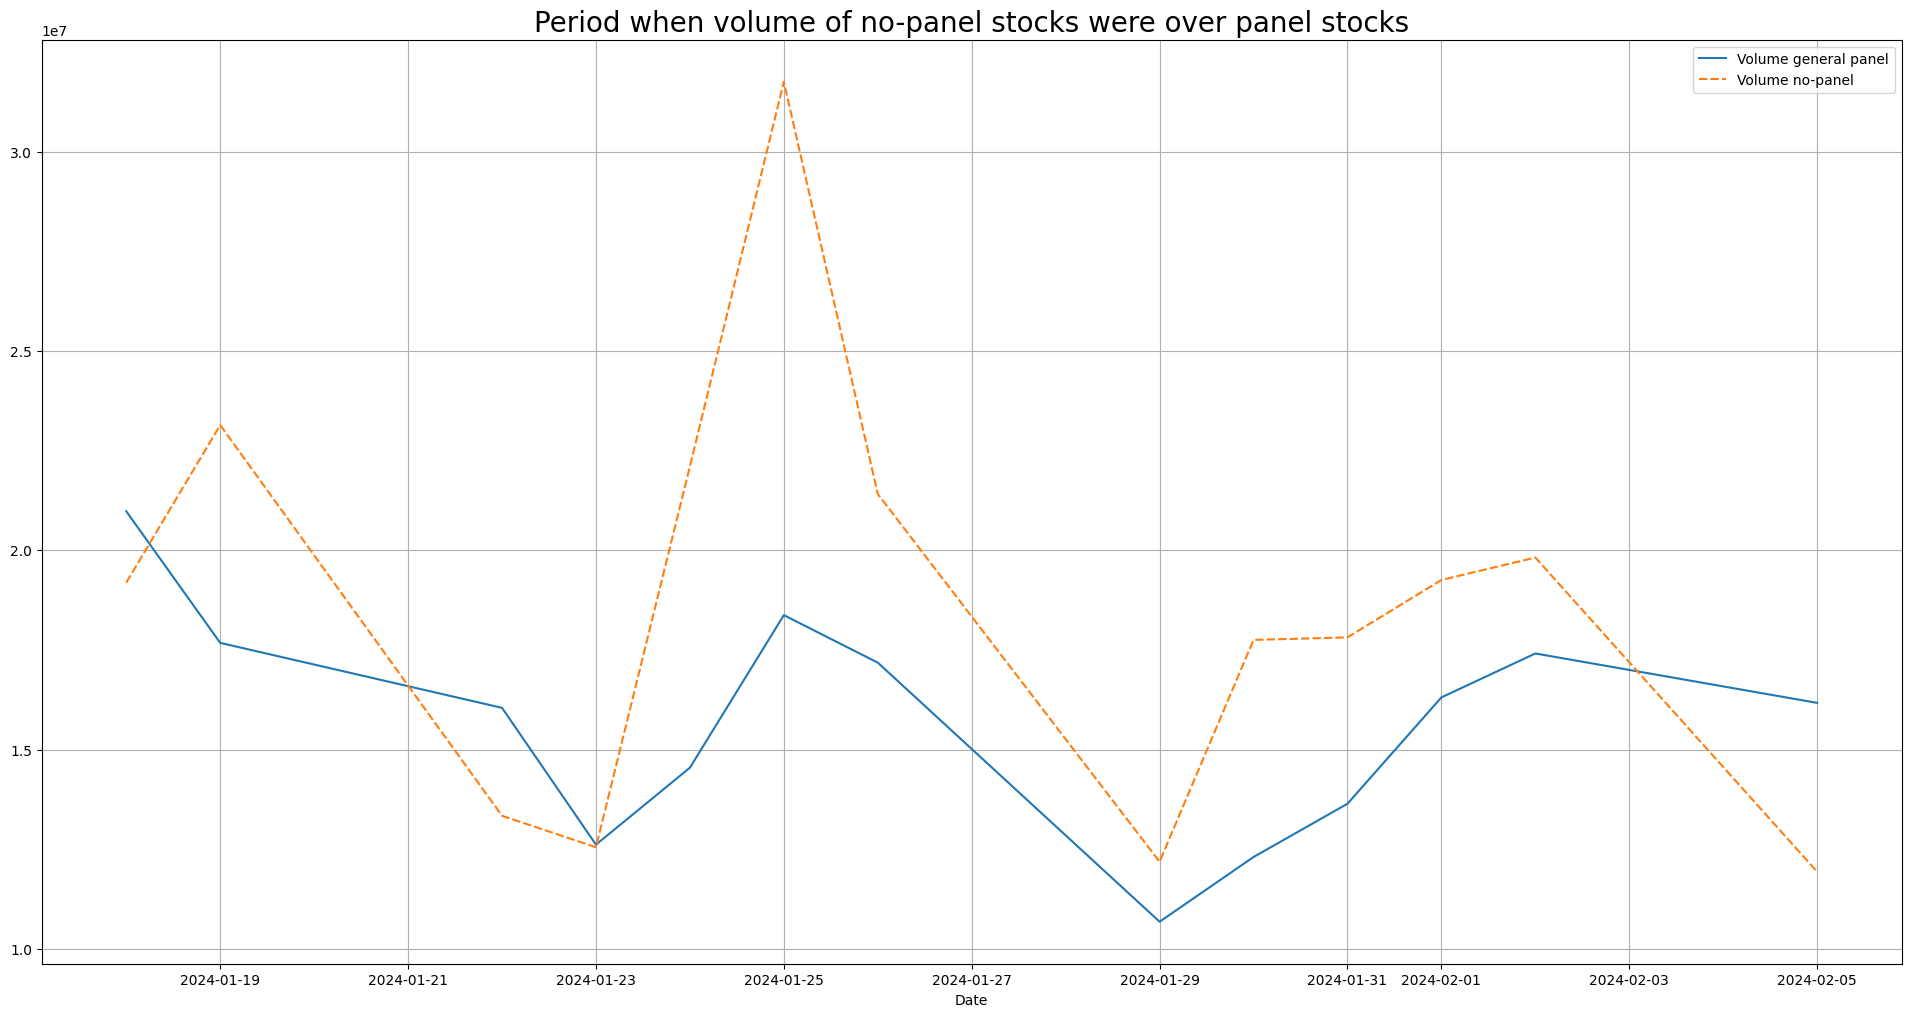

In [240]:
plt.figure(figsize=(24,12))
plt.title("Period when volume of no-panel stocks exceeded panel stocks" , fontsize=20)
sns.lineplot(volumes_d.loc["2024-01-18" : "2024-02-05"])
plt.grid()

In [241]:
#No-panel stocks along the period.
nopanel_period = market_volume.loc["2024-01-18" : "2024-02-05", ~(market_volume.columns.isin(panel_general))].sum().sort_values(ascending=False) 

#No-panel stocks at the highest pike of the period.
nopanel_at_pike = market_volume.loc["2024-01-25", ~(market_volume.columns.isin(panel_general))].sort_values(ascending=False)

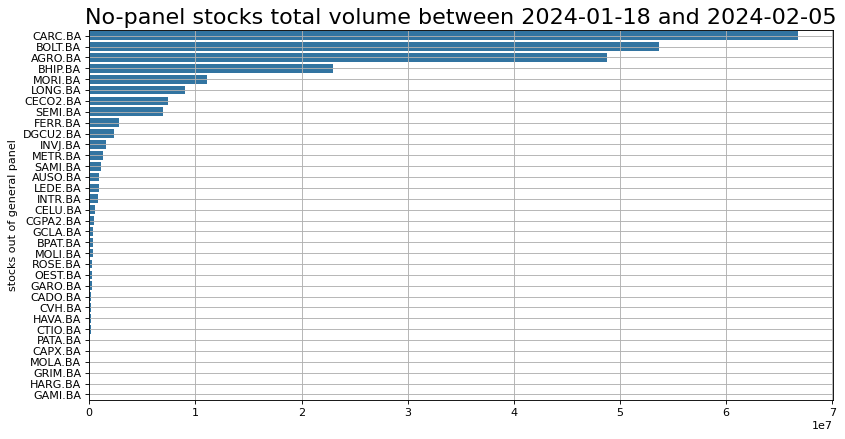

In [242]:
plt.figure(figsize=(12, 6), dpi=80)
plt.title( "No-panel stocks total volume from 2024-01-18 to 2024-02-05", fontsize=20)
sns.barplot(nopanel_period , orient="h").set(ylabel = "stocks out of general panel")
plt.grid()

([<matplotlib.patches.Wedge at 0x24b4cfc9d60>,
 [Text(0.7130178589830132, 0.8376189663392778, 'CARC.BA'),
  Text(-0.8308505106764525, 0.7208934934570281, 'BOLT.BA'),
  Text(-0.8993016031009012, -0.6334482036126942, 'AGRO.BA'),
  Text(-0.02967795282763542, -1.0995995721697789, 'BHIP.BA'),
  Text(0.44274486630589166, -1.006964241351091, 'MORI.BA'),
  Text(0.6869395325959948, -0.8591356578310531, 'LONG.BA'),
  Text(1.0174651529983136, -0.41804863644571094, 'Others')],
 [Text(0.3889188321725526, 0.45688307254869687, '28%'),
  Text(-0.45319118764170135, 0.39321463279474256, '22%'),
  Text(-0.49052814714594606, -0.3455172019705604, '20%'),
  Text(-0.016187974269619317, -0.5997815848198793, '9%'),
  Text(0.2414971998032136, -0.5492532225551405, '5%'),
  Text(0.3746942905069062, -0.46861944972602887, '4%'),
  Text(0.5549809925445347, -0.22802652897038775, '12%')])

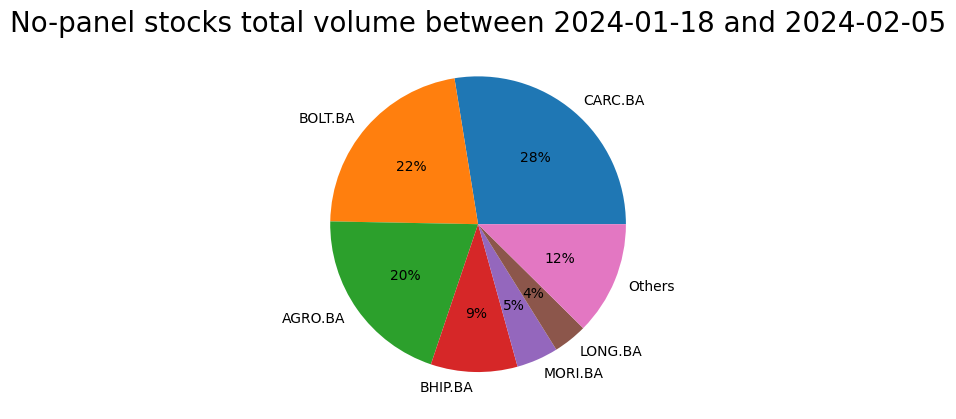

In [243]:
#Pie chart
x = nopanel_period.sort_values(ascending=False).head(6)
y = pd.Series(index=["Others"] , data= [nopanel_period.sort_values(ascending=False).tail(len(nopanel_period)-6).sum()] ).transpose()
data_pie = pd.concat([ x , y] ,axis=0 )

plt.title( "No-panel stocks total volume from 2024-01-18 to 2024-02-05", fontsize=20)
plt.pie(data_pie, labels= data_pie.index , autopct='%.0f%%') 

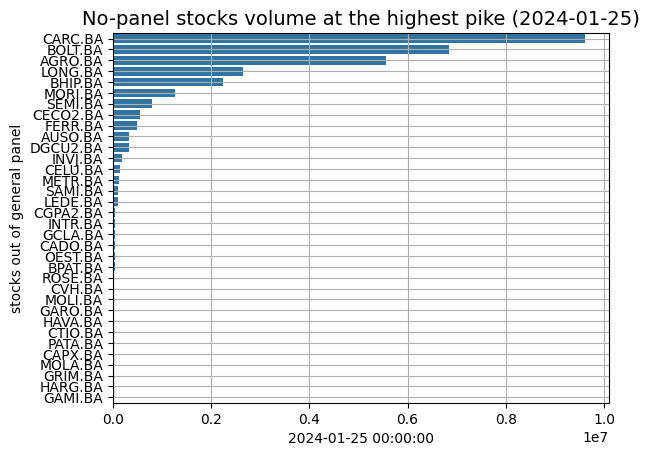

In [244]:
plt.title( "No-panel stocks volume at the highest pike (2024-01-25)", fontsize=14)
sns.barplot(nopanel_at_pike , orient="h" ).set(ylabel = "stocks out of general panel")
plt.grid()

([<matplotlib.patches.Wedge at 0x24b50354560>,
 [Text(0.6384173073810482, 0.8957808558103552, 'CARC.BA'),
  Text(-0.9314797787269427, 0.5851029155822128, 'BOLT.BA'),
  Text(-0.8638598010040766, -0.6809891659998691, 'AGRO.BA'),
  Text(-0.09862972385277377, -1.0955693394636077, 'LONG.BA'),
  Text(0.4219698338078096, -1.0158451945824274, 'BHIP.BA'),
  Text(0.7418962493303222, -0.8121514361432852, 'MORI.BA'),
  Text(1.0323644135359697, -0.3797679787245543, 'Others')],
 [Text(0.3482276222078444, 0.4886077395329209, '30%'),
  Text(-0.508079879305605, 0.31914704486302514, '22%'),
  Text(-0.4711962550931326, -0.37144863599992856, '18%'),
  Text(-0.053798031192422054, -0.5975832760710587, '8%'),
  Text(0.23016536389516884, -0.5540973788631421, '7%'),
  Text(0.40467068145290297, -0.4429916924417919, '4%'),
  Text(0.5631078619287107, -0.20714617021339324, '11%')])

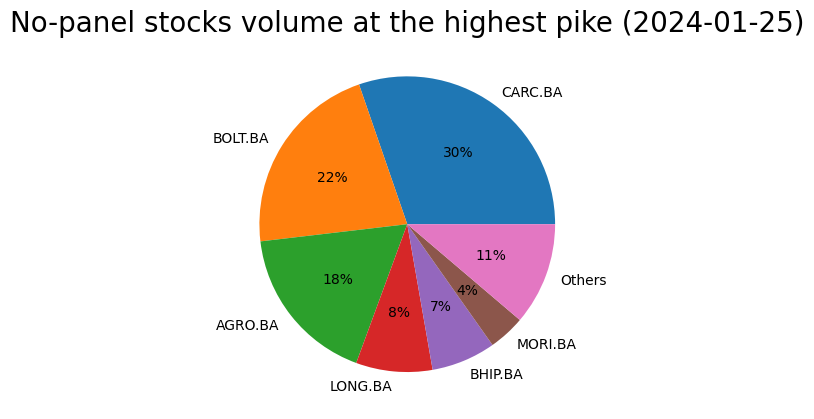

In [245]:
#Pie chart
x = nopanel_at_pike.sort_values(ascending=False).head(6)
y = pd.Series(index=["Others"] , data= [nopanel_at_pike.sort_values(ascending=False).tail(len(nopanel_at_pike)-6).sum()] ).transpose()
data_pie = pd.concat([ x , y] ,axis=0 )

plt.title( "No-panel stocks volume at the highest pike (2024-01-25)", fontsize=20)
plt.pie(data_pie, labels= data_pie.index , autopct='%.0f%%') 

Two stocks could have the same volume but their price could go in oposit directions and this could be a clue of capital flow from one group of stocks to another. Now we´ll be checking whether this is the case at the period where stocks out of the general panel were over the general panel looking at the price changes


In [246]:
#Price change for both groups.
general_panel_close = market_df.Close[panel_general].pct_change()
nopanel_close = market_df.Close[nopanel_at_pike.index].pct_change()

#Price change along period for both groups.
general_panel_close_period = general_panel_close.loc["2024-01-18" : "2024-02-05" , :]
nopanel_close_period= nopanel_close.loc["2024-01-18" : "2024-02-05" , :]

#Price change at the highest pike of the period for both groups.
general_panel_close_pike = general_panel_close.loc["2024-01-25" , :]
nopanel_close_pike= nopanel_close.loc["2024-01-25" , :]

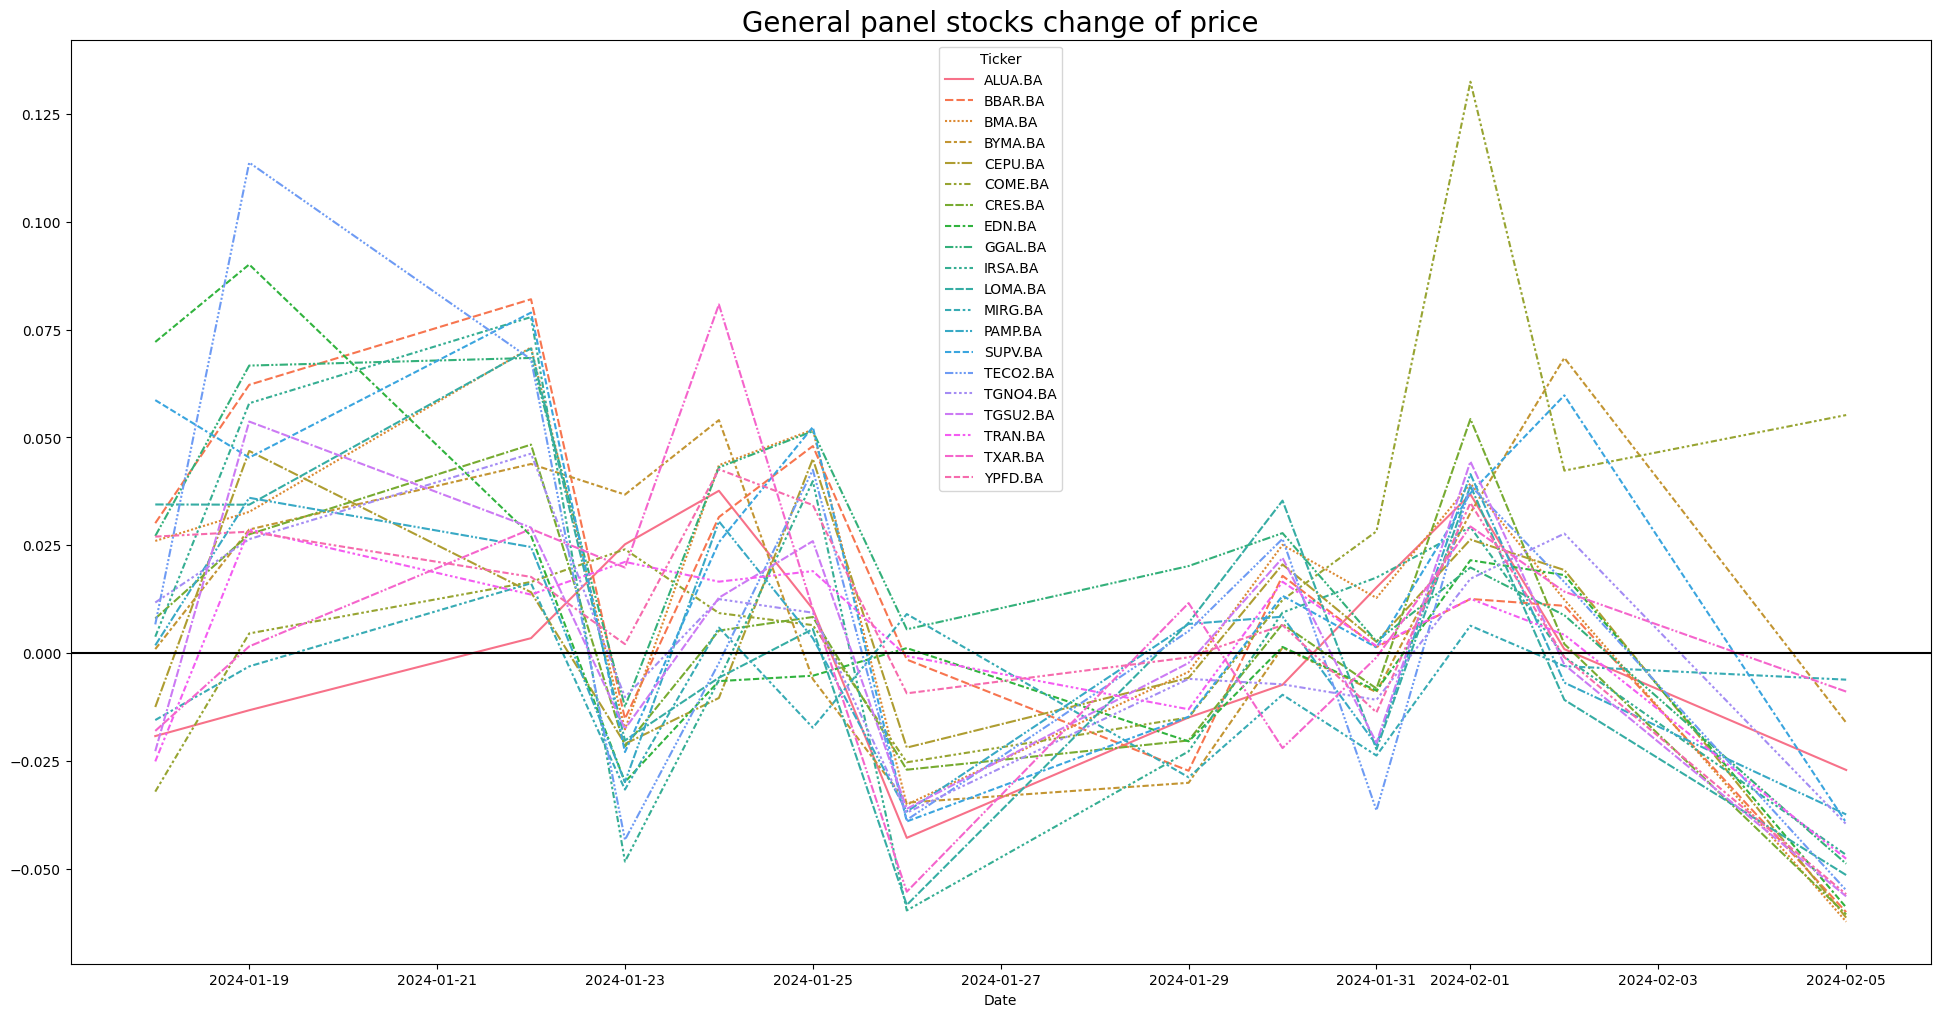

In [247]:
plt.figure(figsize=(24,12))
plt.title( "General panel stocks change of price", fontsize=20)
sns.lineplot(general_panel_close_period)
plt.axhline( y =0 , color= "k")

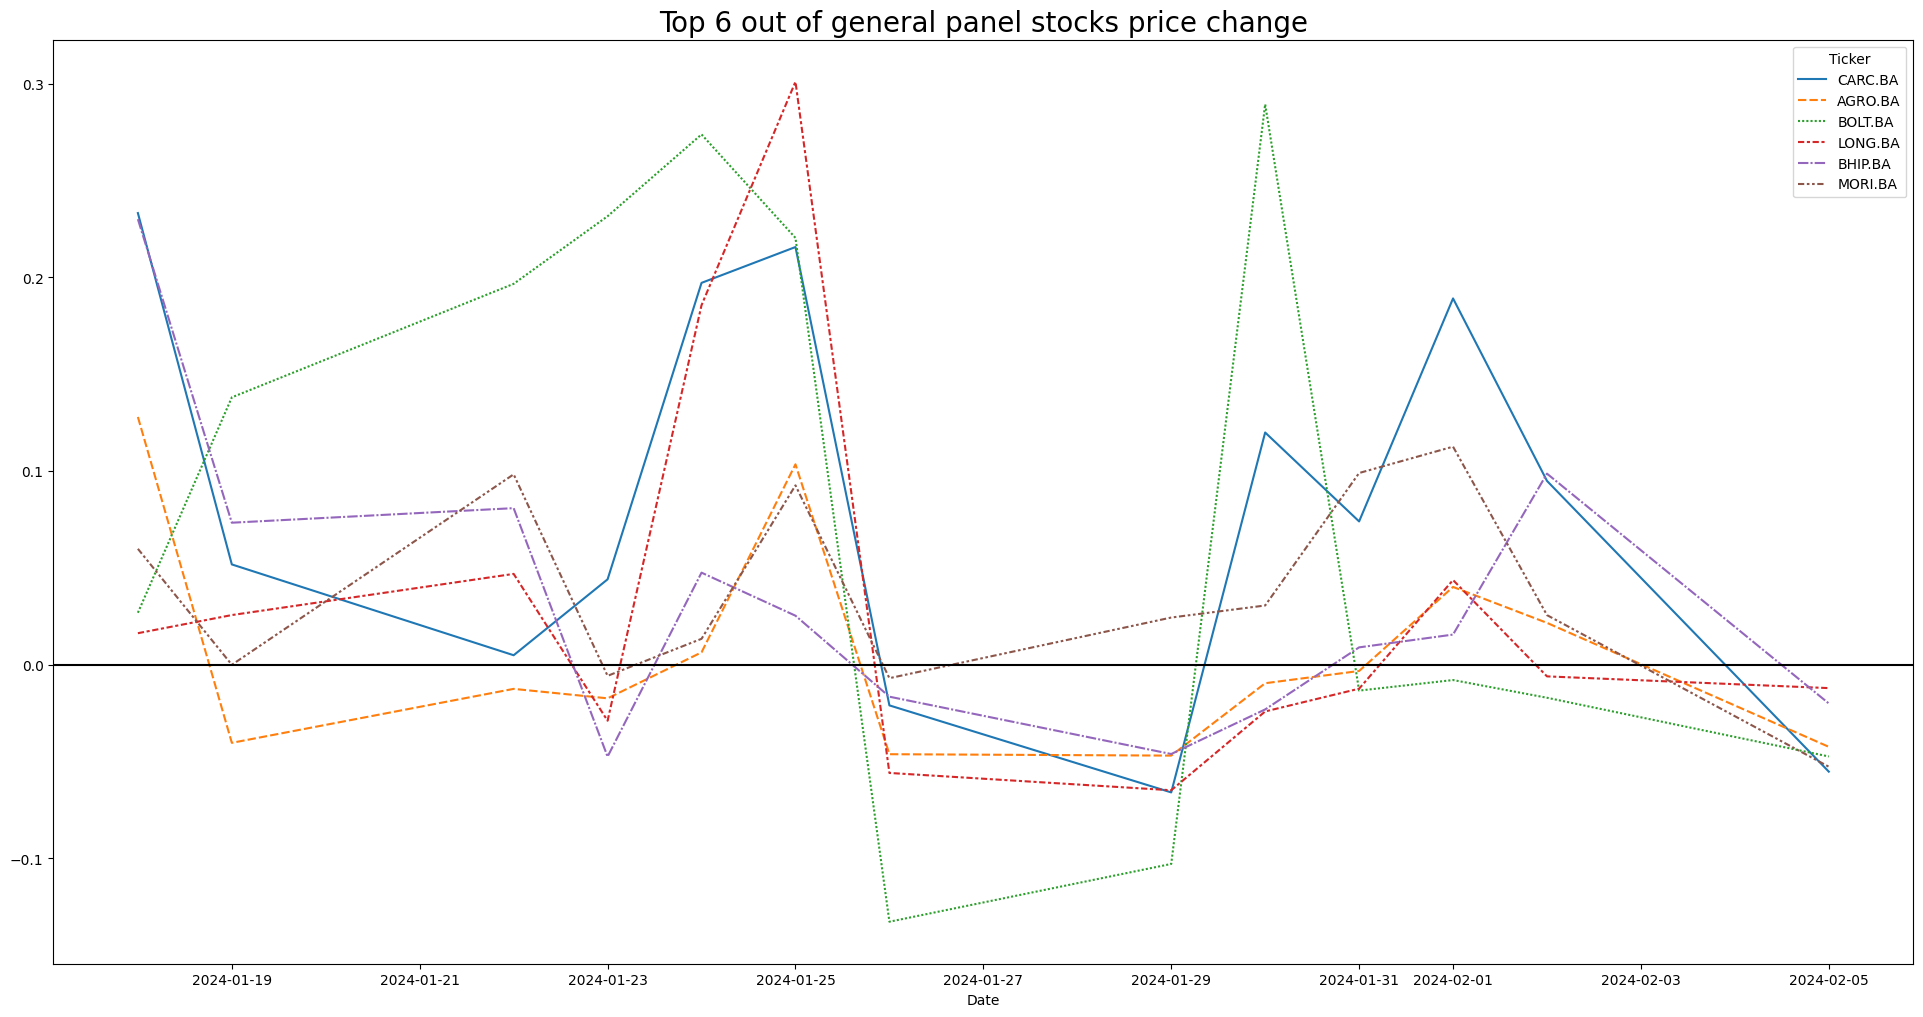

In [248]:
plt.figure(figsize=(24,12))
plt.title( "Top 6 out of general panel stocks price change", fontsize=20)
sns.lineplot(nopanel_close_period.loc[: , ["CARC.BA" ,"AGRO.BA" ,"BOLT.BA" ,"LONG.BA" , "BHIP.BA","MORI.BA"]])
plt.axhline( y =0 , color= "k")

<Axes: title={'center': 'Correlation of price change (2024-01-18 - 2024-02-05)'}, xlabel='Ticker', ylabel='Ticker'>

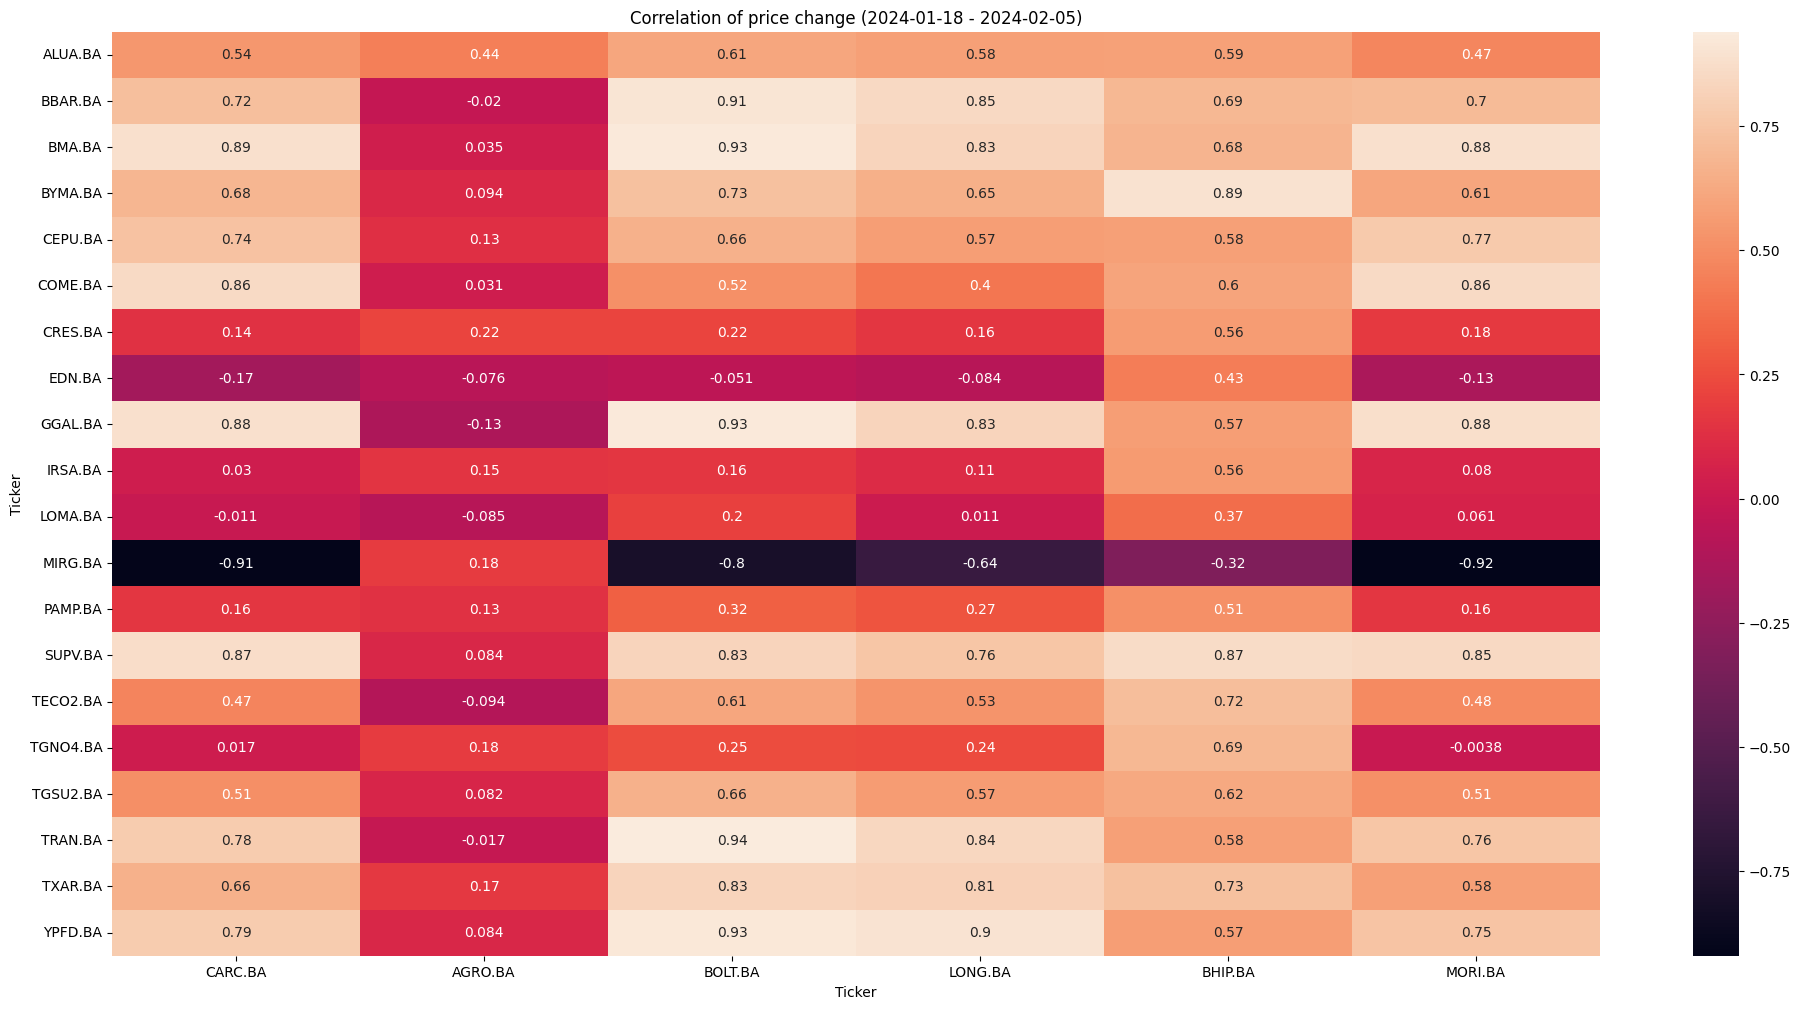

In [249]:
z = panel_general + list(nopanel_at_pike.index)
market_corr = market_df.Close.loc["2024-01-18" : "2024-02-05", z].corr().loc[panel_general , ["CARC.BA" ,"AGRO.BA" ,"BOLT.BA" ,"LONG.BA" , "BHIP.BA","MORI.BA"]]
plt.figure(figsize=(24,12))
plt.title("Correlation of price change (2024-01-18 - 2024-02-05)")
sns.heatmap(market_corr , annot=True)

Overall we can see that there is a positive correlation on price change and volume change as we saw earlier. So we can discard the hipotesis of capital flow from one group of stock to another.

<Axes: title={'center': 'Correlation of price change over the year'}, xlabel='Ticker', ylabel='Ticker'>

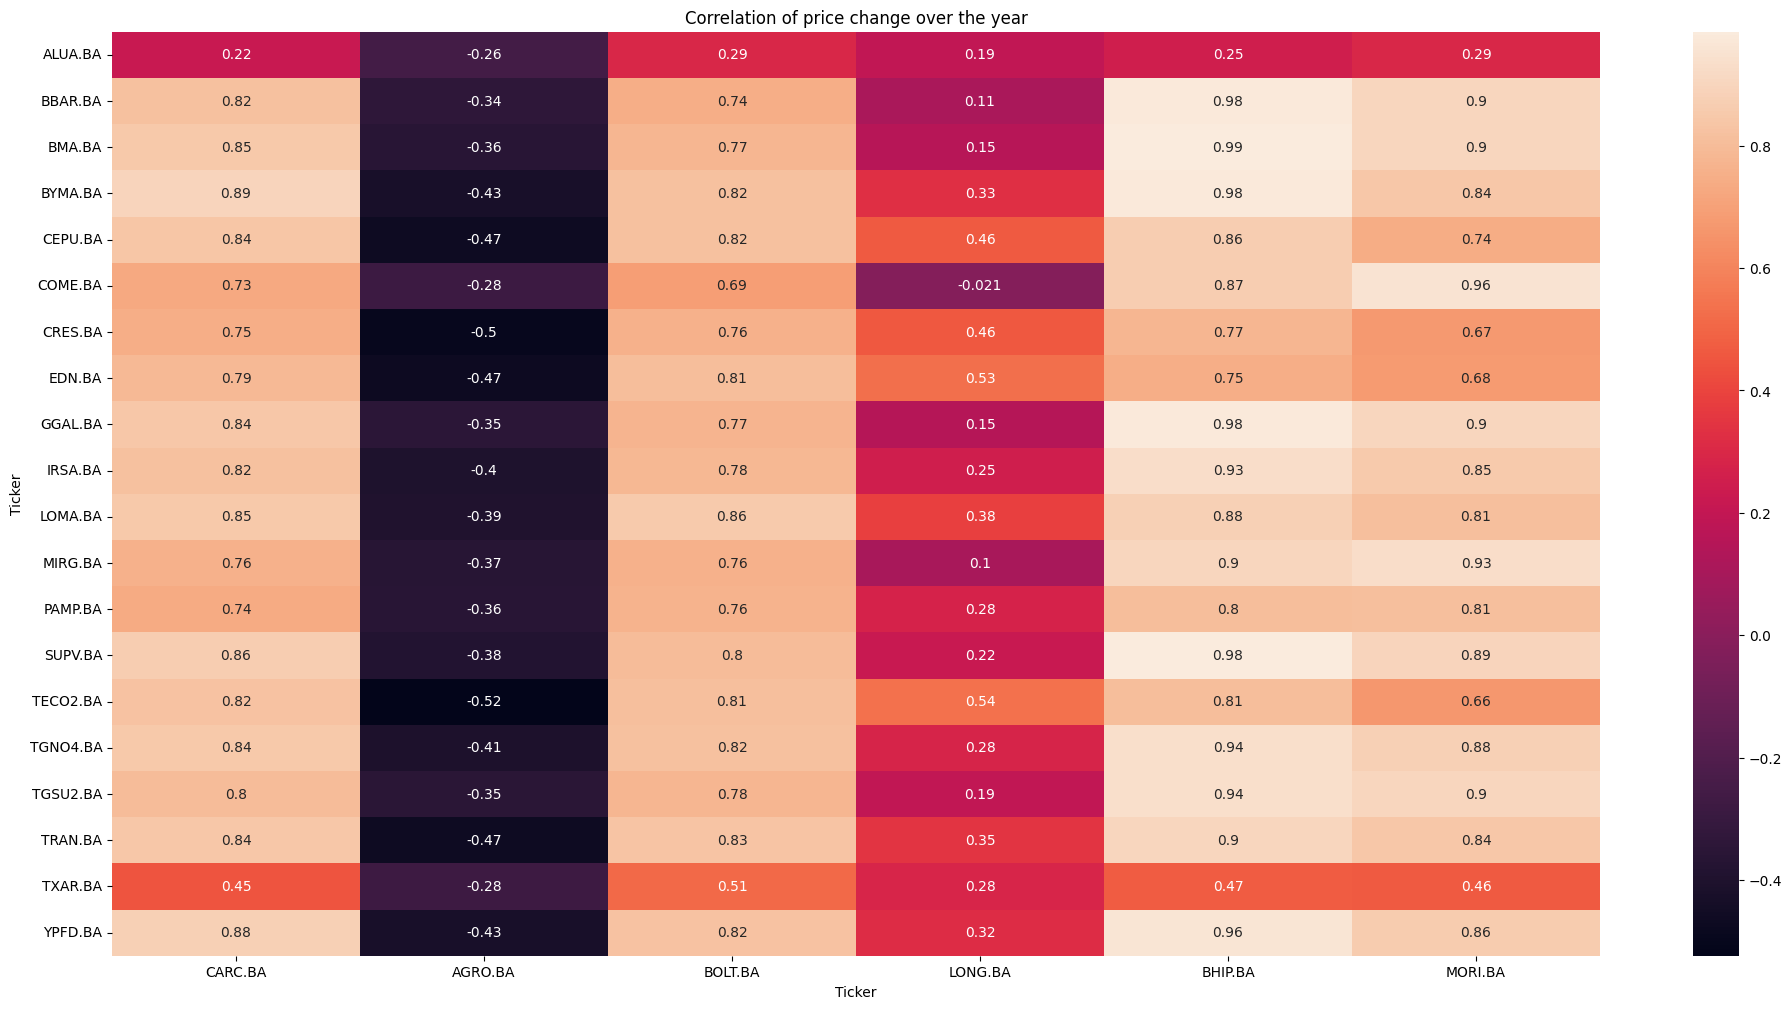

In [250]:
z = panel_general + list(nopanel_at_pike.index)
market_corr_y = market_df.Close.loc[:, z].corr().loc[panel_general , ["CARC.BA" ,"AGRO.BA" ,"BOLT.BA" ,"LONG.BA" , "BHIP.BA","MORI.BA"]]
plt.figure(figsize=(24,12))
plt.title("Correlation of price change over the year")
sns.heatmap(market_corr_y , annot=True)

<Axes: title={'center': 'Correlation mean diference between year and the period'}, xlabel='Ticker'>

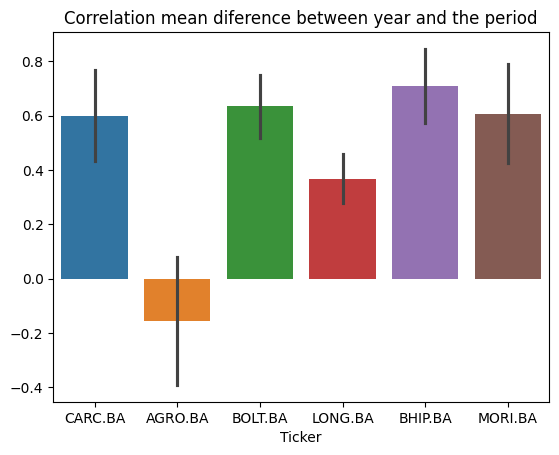

In [251]:
diff_corr = pd.DataFrame({"Year" : market_corr_y.mean() , "Period" :market_corr.mean()})
plt.title("Correlation mean diference between year and the period")
sns.barplot(diff_corr.transpose() )

## Observations 

<ul>
<li>Volumes in general have a neutral to positive correlate</li>
<li>Price changes generally have a neutral to positive correlate</li>
<li>There was a period from 2024-01-18 to 2024-02-05 were volume of stocks outside the general panel exceeded the general panel</li>
<li>The increase in volume at 2024-01-18 to 2024-02-05 of no-panel stocks, were mainly due to CARC , AGRO, BOLT, LONG. BHIP , MORI</li>
<li>AGRO at 2024-01-18 to 2024-02-05 had a neutral to positve correlated with the general panel unlike to the negative correlation throughou the year</li>
<li>The higest pike at 2024-01-25 in change of volume and price were followed by a profit-taking</li>
<li>Given the correlation of price changes in general there is no evidence of capital flow from one group to another</li>
</ul>
